# Importing libraries and reading the datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [4]:
orders_df = pd.read_csv("E:\data secrets hackathon\Data Secrets First Cup\Datasets\orders.csv")

In [5]:
mobile_events_df = pd.read_csv("E:\data secrets hackathon\Data Secrets First Cup\Datasets\mobile_events.csv")

In [6]:
clients_promo_october_df = pd.read_csv("E:\data secrets hackathon\Data Secrets First Cup\Datasets\clients_promo_october.csv")

In [7]:
train_target_df = pd.read_csv("E:/data secrets hackathon/Data Secrets First Cup/Datasets/train_target.csv")

In [8]:
submit_df = pd.read_csv("E:\data secrets hackathon\Data Secrets First Cup\Datasets\submit.csv")

In [9]:
test_df = pd.read_csv("E:/data secrets hackathon/Data Secrets First Cup/Datasets/test.csv")

# EDA

## Orders 

In [10]:
orders_df.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,apply_promo
0,020DD76CCD949AE011EDE031ED5D76FD,NaN,NaN,000D3AAC9DCABB2E11EBE0614C89D044,2023-04-21,2023-04-21T20:51:26.000Z,000D3A2480C380DA11E692CFB9F92484,0,18,000D3A240C71BE9A11E719BE2AB264A6,4,1.0,45.0,4,2,1.0,3,0
1,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EC9AABAD354BE051CCF1EE1F83A8D0,1,485.0,485.0,4,2,1164.0,1,0
2,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,11EB846583CB3BDEA80D1A7F2E184D40,1,589.0,589.0,4,2,1164.0,1,0
3,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB267FD,4,45.0,45.0,4,2,1164.0,1,0
4,02164D9B0F67BC3311EE610987AF48C7,0.0,0.0,000D3A21DA51A81411EAF10674007D74,2023-10-02,2023-10-02T21:31:32.000Z,000D3A26B5B080DF11E745FD0474B95C,0,29,000D3A240C71BE9A11E719BE2AB264A6,4,45.0,45.0,4,2,1164.0,1,0


In [11]:
orders_df.shape

(611739, 18)

In [12]:
# Rename the 'apply_promo' column to 'target'
orders_df = orders_df.rename(columns={'apply_promo': 'target'})

### Target

In [13]:
orders_df['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: target
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 4.7 MB


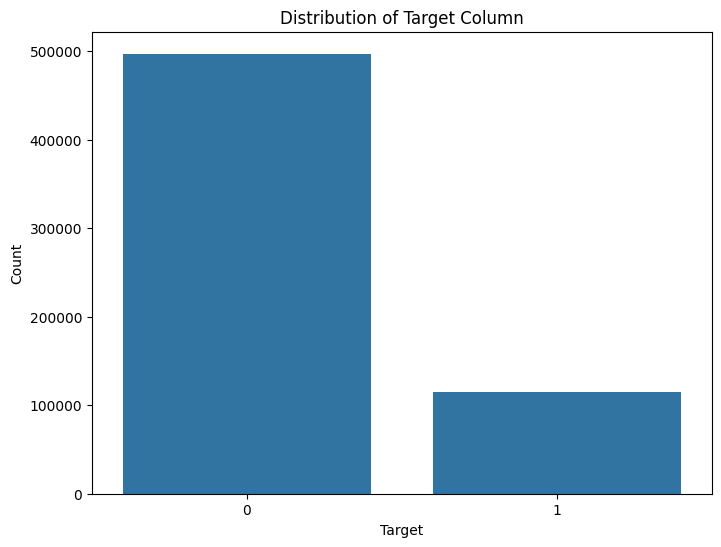

In [14]:
# Visualize the distribution of the 'target' column using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=orders_df)
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

### addressId

In [15]:
orders_df['addressId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: addressId
Non-Null Count   Dtype  
--------------   -----  
488325 non-null  float64
dtypes: float64(1)
memory usage: 4.7 MB


In [16]:
# Count the number of unique 'addressId' values
num_unique_addressIds = orders_df['addressId'].nunique()
print(num_unique_addressIds)

2706


In [17]:
# Count the number of missing values in the 'addressId' column
num_missing_addressIds = orders_df['addressId'].isnull().sum()
print(num_missing_addressIds)

123414


In [18]:
# Find the 20 most frequent 'addressId' values
top_addressIds = orders_df['addressId'].value_counts().head(20)
print(top_addressIds)

addressId
0.0           474495
17393412.0        77
16112217.0        41
5642446.0         33
2698595.0         32
2023758.0         31
17022323.0        31
12549302.0        30
13715854.0        30
5067633.0         29
1714628.0         28
15532283.0        27
287153.0          27
16053444.0        27
2228933.0         26
17359965.0        26
16605982.0        26
13355247.0        26
1395220.0         25
13213334.0        25
Name: count, dtype: int64


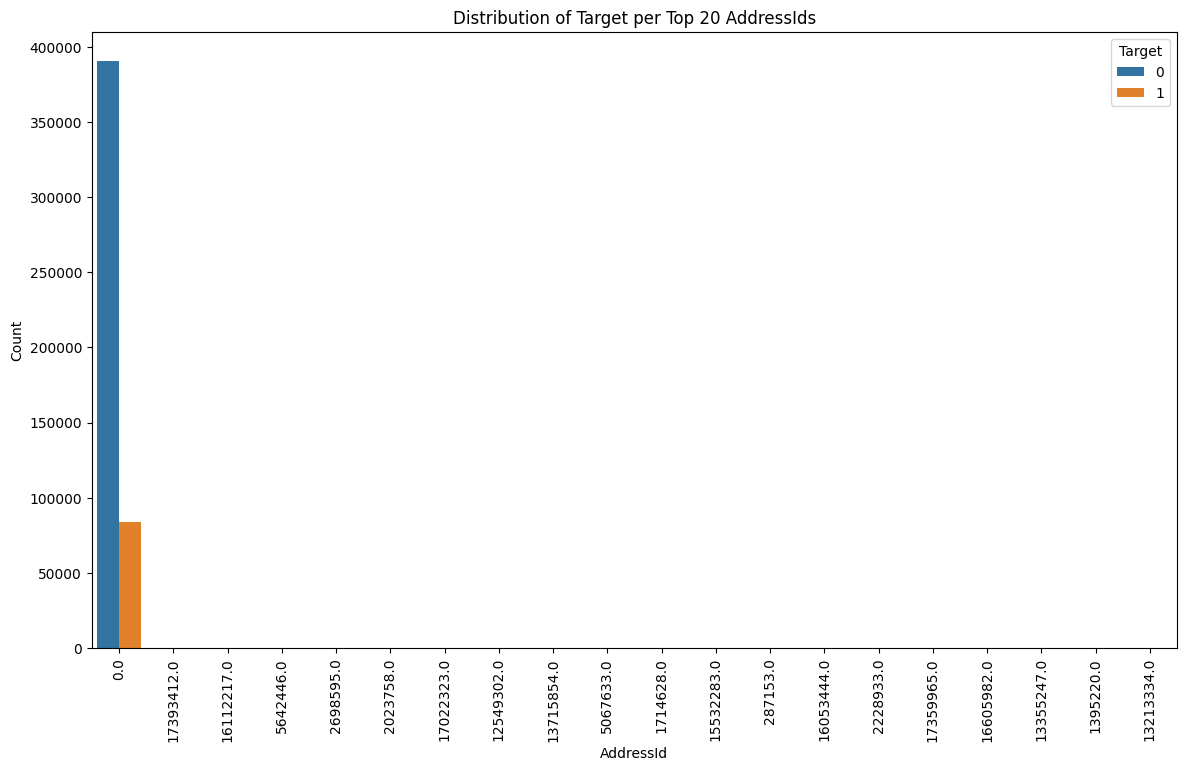

In [19]:
# Get the top 20 most frequent addressId values
top_addressIds = orders_df['addressId'].value_counts().head(20).index

# Filter the dataframe to include only these top addressIds
filtered_df = orders_df[orders_df['addressId'].isin(top_addressIds)]

# Create a count plot to show the distribution of target values for each top addressId
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='addressId', hue='target', order=top_addressIds)
plt.title('Distribution of Target per Top 20 AddressIds')
plt.xlabel('AddressId')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.legend(title='Target')
plt.show()

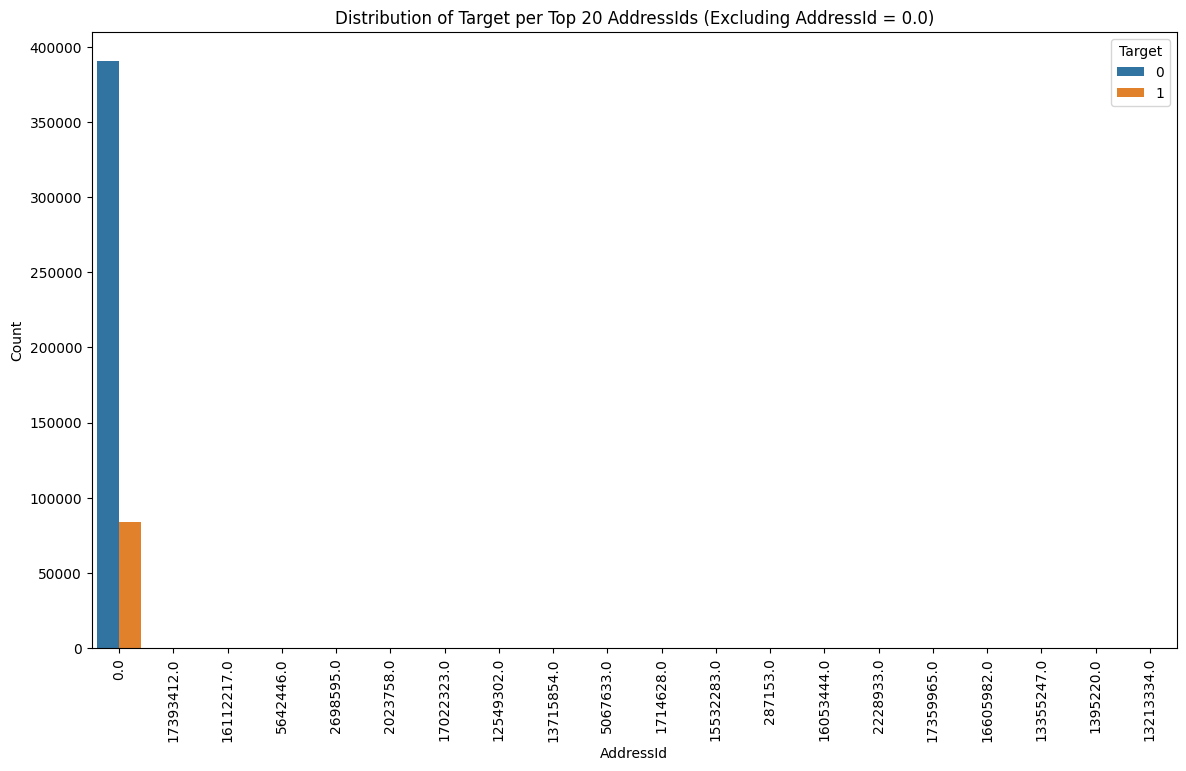

In [20]:
# Get the top 20 addressIds based on frequency, excluding '0.0'
top_addressIds = orders_df['addressId'].value_counts().head(21).index  # Get top 21 to include '0.0' for exclusion
top_addressIds = top_addressIds[top_addressIds != '0.0'][:20]  # Exclude '0.0' and then take the top 20

# Filter the dataset to include only rows with the top 20 addressIds
filtered_df = orders_df[orders_df['addressId'].isin(top_addressIds)]

# Plot the relationship between top addresses and target
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='addressId', hue='target', order=top_addressIds)
plt.title('Distribution of Target per Top 20 AddressIds (Excluding AddressId = 0.0)')
plt.xlabel('AddressId')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.legend(title='Target')
plt.show()

### deliverySectorId

In [21]:
orders_df['deliverySectorId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: deliverySectorId
Non-Null Count   Dtype  
--------------   -----  
488325 non-null  float64
dtypes: float64(1)
memory usage: 4.7 MB


In [22]:
# Count the number of unique 'addressId' values
num_unique_addressSectorIds = orders_df['deliverySectorId'].nunique()
print(num_unique_addressSectorIds)

1259


In [23]:
# Count the number of missing values in the 'addressId' column
num_missing_addressSectorIds = orders_df['deliverySectorId'].isnull().sum()
print(num_missing_addressSectorIds)

123414


In [24]:
# Identify rows where 'addressId' is NaN
addressId_na = orders_df['addressId'].isna()

# Identify rows where 'deliverySectorId' is NaN
deliverySectorId_na = orders_df['deliverySectorId'].isna()

# Check if NaNs in 'addressId' and 'deliverySectorId' are in the same rows
same_na_rows = addressId_na & deliverySectorId_na

# Count the number of overlaps
num_overlaps = same_na_rows.sum()

# Check if all NaNs overlap
all_nans_overlap = num_overlaps == addressId_na.sum() == deliverySectorId_na.sum()

# Print the results
print(f"Number of rows where both 'addressId' and 'deliverySectorId' are NaN: {num_overlaps}")

if all_nans_overlap:
    print("All NaNs in 'addressId' and 'deliverySectorId' overlap.")
else:
    print("Not all NaNs in 'addressId' and 'deliverySectorId' overlap.")

Number of rows where both 'addressId' and 'deliverySectorId' are NaN: 123414
All NaNs in 'addressId' and 'deliverySectorId' overlap.


In [25]:
top_addressSectorIds = orders_df['deliverySectorId'].value_counts().head(20)
print(top_addressSectorIds)

deliverySectorId
0.0       474495
1568.0        81
5609.0        77
29.0          72
963.0         72
5129.0        67
920.0         65
4480.0        62
1483.0        62
4463.0        60
42.0          59
6129.0        57
2756.0        56
348.0         55
1881.0        53
4524.0        53
1478.0        52
912.0         52
1033.0        51
792.0         49
Name: count, dtype: int64


### Date

In [26]:
orders_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
611739 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [27]:
num_unique_dates = orders_df['Date'].nunique()

print(f"Number of unique values in the 'Date' column: {num_unique_dates}")

Number of unique values in the 'Date' column: 231


In [28]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Find the earliest and latest dates
earliest_date = orders_df['Date'].min()
latest_date = orders_df['Date'].max()

print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")

Earliest Date: 2023-03-15 00:00:00
Latest Date: 2023-10-31 00:00:00


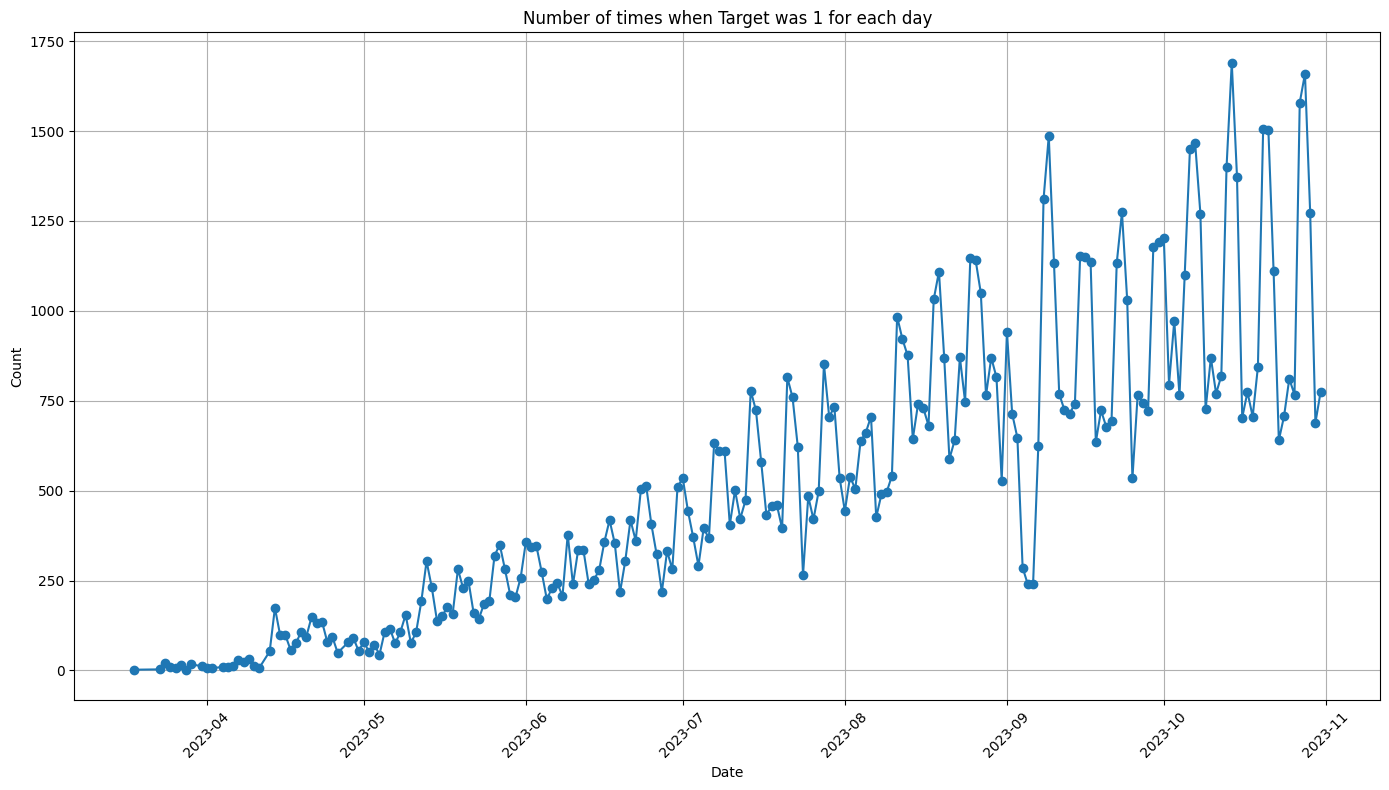

In [29]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Filter rows where 'target' is 1
target_1_df = orders_df[orders_df['target'] == 1]

# Group by 'Date' and count occurrences of 'target' being 1
target_1_per_day = target_1_df.groupby('Date')['target'].sum()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(target_1_per_day.index, target_1_per_day.values, marker='o', linestyle='-')
plt.title('Number of times when Target was 1 for each day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

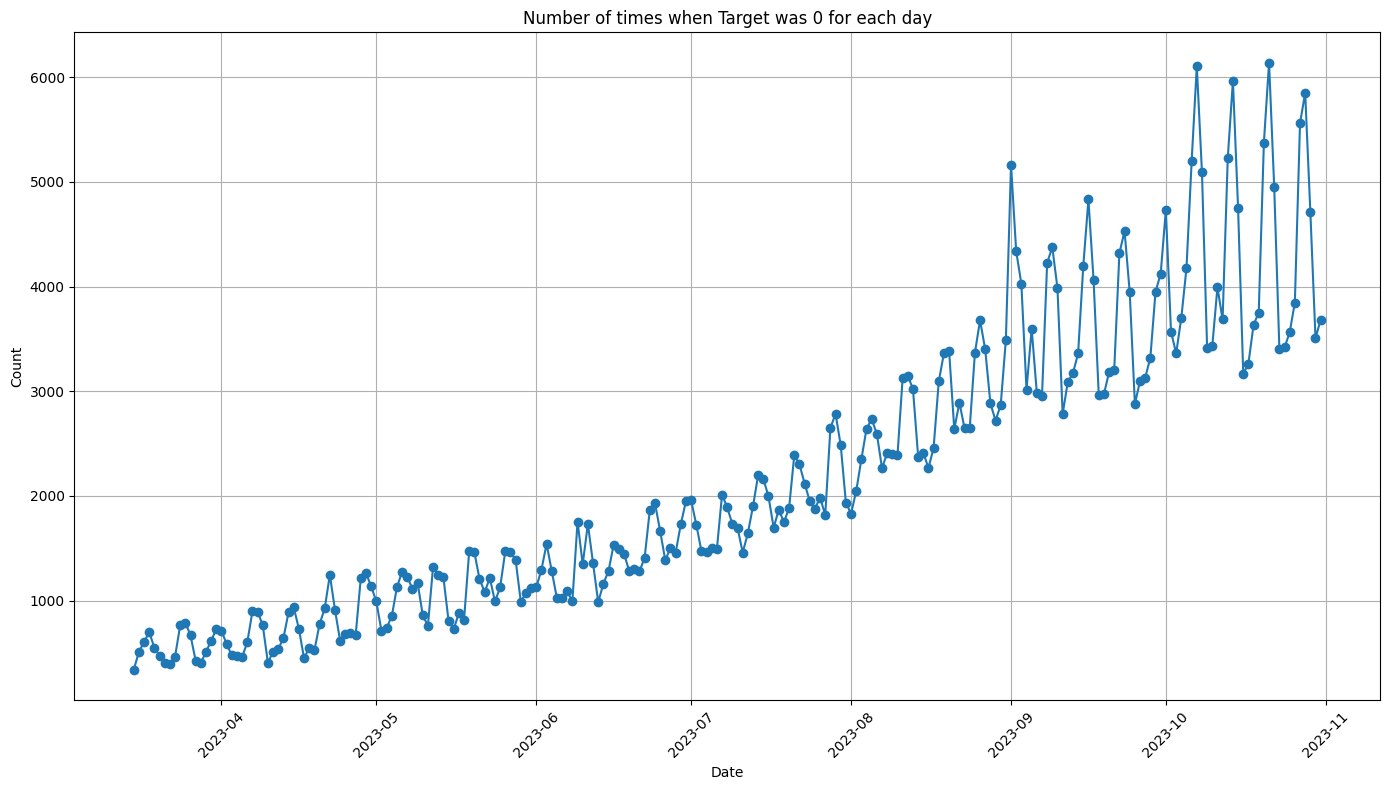

Number of times when 'target' was 0 for each day:
Date
2023-03-15     339
2023-03-16     509
2023-03-17     606
2023-03-18     698
2023-03-19     549
              ... 
2023-10-27    5560
2023-10-28    5850
2023-10-29    4716
2023-10-30    3508
2023-10-31    3682
Name: target, Length: 231, dtype: int64


In [30]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Filter rows where 'target' is 0
target_0_df = orders_df[orders_df['target'] == 0]

# Group by 'Date' and count occurrences of 'target' being 0
target_0_per_day = target_0_df.groupby('Date')['target'].count()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(target_0_per_day.index, target_0_per_day.values, marker='o', linestyle='-')
plt.title('Number of times when Target was 0 for each day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, print the number of times target was 0 for each day
print("Number of times when 'target' was 0 for each day:")
print(target_0_per_day)

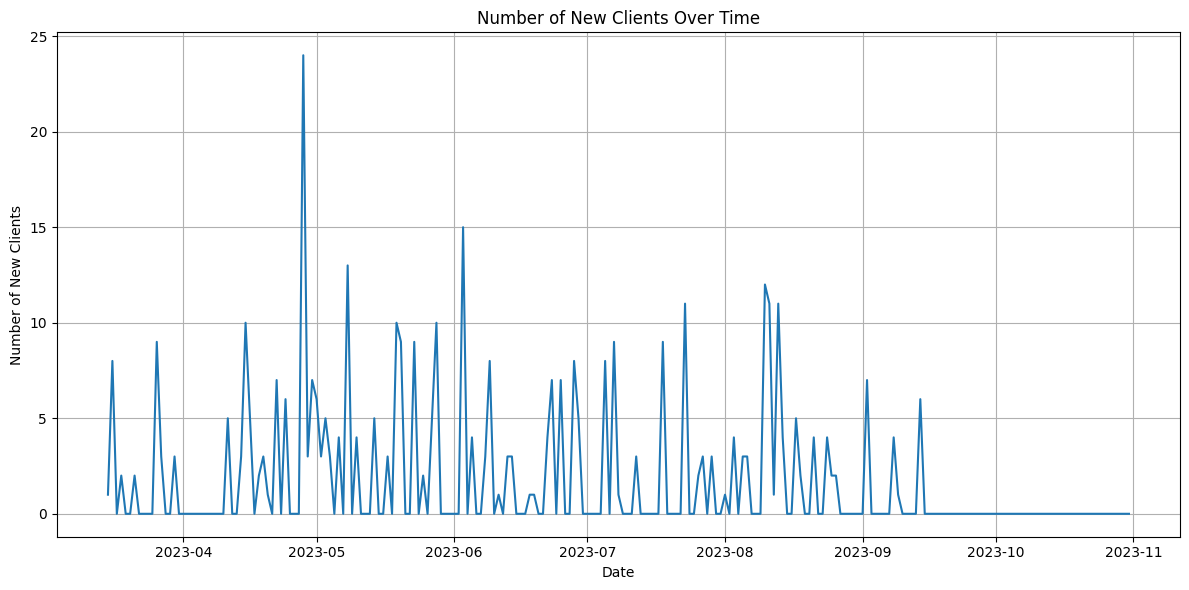

In [31]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Group by 'Date' and sum 'NewClient' to get the number of new clients per date
new_clients_per_date = orders_df.groupby('Date')['NewClient'].sum().reset_index()

# Plotting the number of new clients over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=new_clients_per_date, x='Date', y='NewClient')
plt.title('Number of New Clients Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

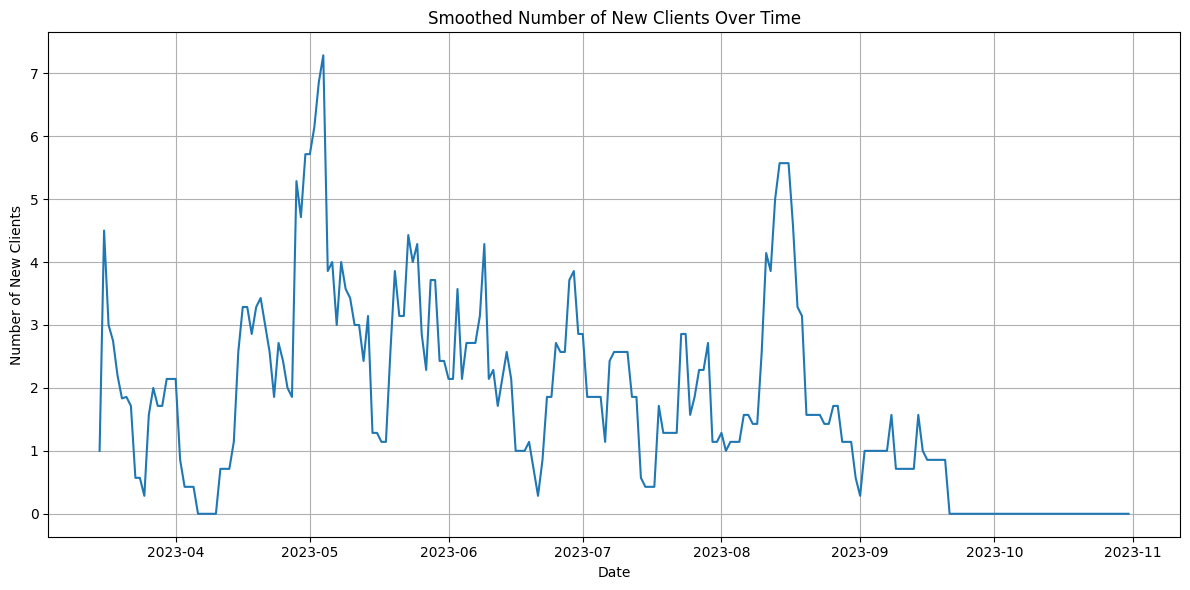

In [32]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Group by 'Date' and sum 'NewClient' to get the number of new clients per date
new_clients_per_date = orders_df.groupby('Date')['NewClient'].sum().reset_index()

# Apply a rolling average with a window of 7 days (adjust the window size as needed)
new_clients_per_date['SmoothedNewClients'] = new_clients_per_date['NewClient'].rolling(window=7, min_periods=1).mean()

# Plotting the smoothed number of new clients over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=new_clients_per_date, x='Date', y='SmoothedNewClients')
plt.title('Smoothed Number of New Clients Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

### SaleDate

In [33]:
orders_df['SaleDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: SaleDate
Non-Null Count   Dtype 
--------------   ----- 
611739 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


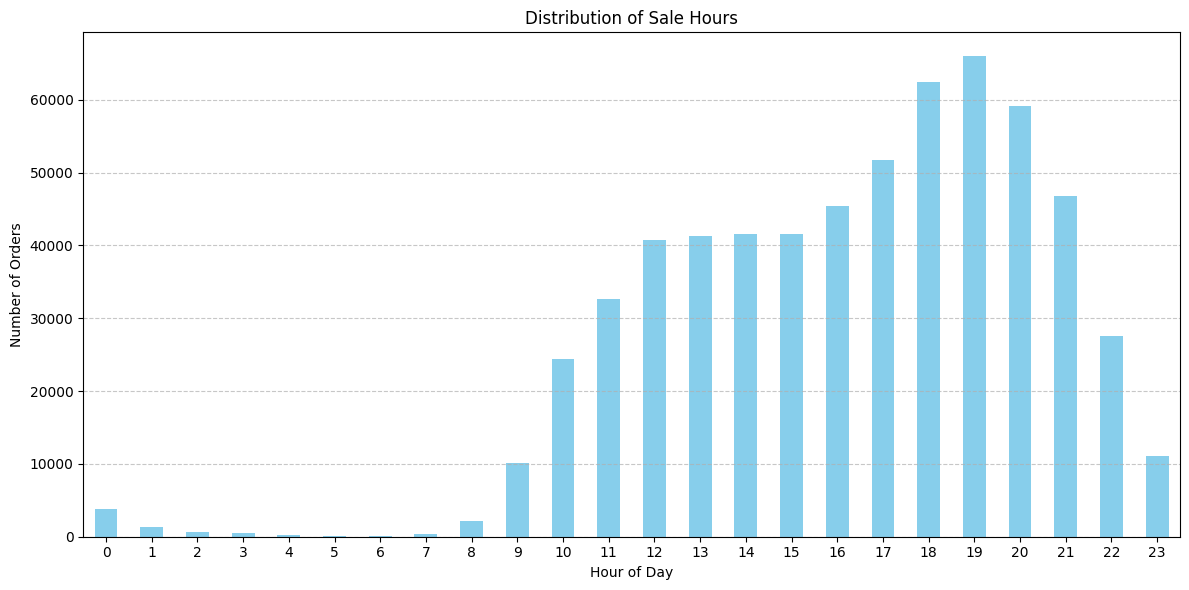

The most popular time of day for orders is around 19:00


In [34]:
# Convert 'SaleDate' column to datetime if it's not already
orders_df['SaleDate'] = pd.to_datetime(orders_df['SaleDate'])

# Extract the hour component from 'SaleDate'
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour

# Plotting
plt.figure(figsize=(12, 6))
orders_df['SaleHour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sale Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Determine the most popular time of day for orders
most_popular_time = orders_df['SaleHour'].mode().values[0]
print(f"The most popular time of day for orders is around {most_popular_time}:00")

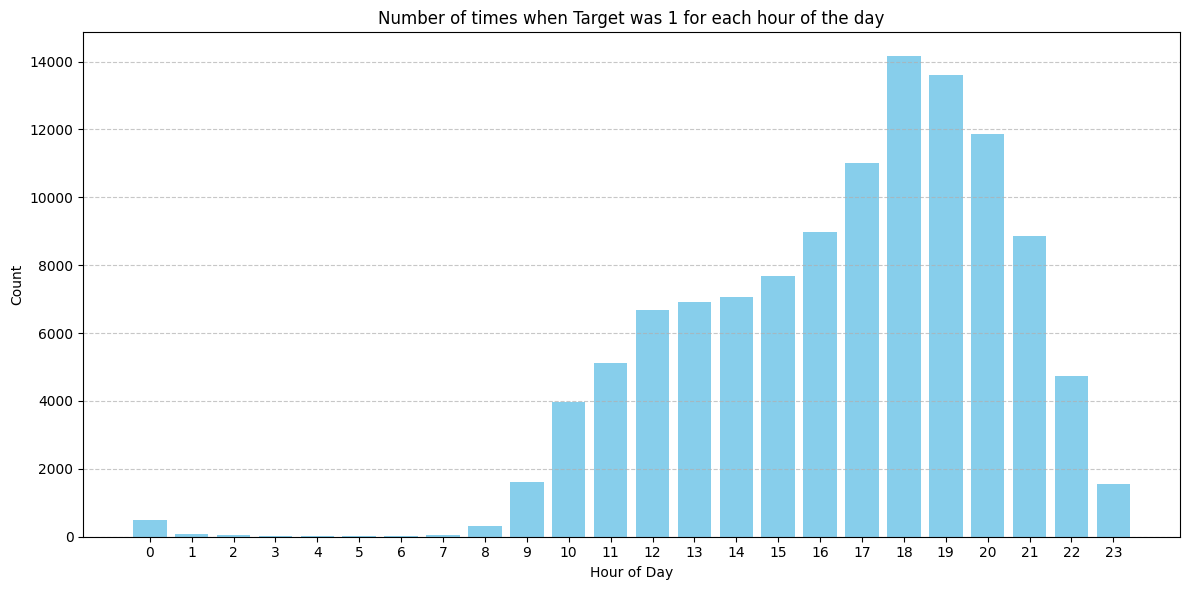

In [35]:
# Convert 'SaleDate' column to datetime if it's not already
orders_df['SaleDate'] = pd.to_datetime(orders_df['SaleDate'])

# Extract the hour component from 'SaleDate'
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour

# Filter rows where 'target' is 1
target_1_df = orders_df[orders_df['target'] == 1]

# Group by 'SaleHour' and count occurrences of 'target' being 1
target_1_per_hour = target_1_df.groupby('SaleHour').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(target_1_per_hour.index, target_1_per_hour.values, color='skyblue')
plt.title('Number of times when Target was 1 for each hour of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

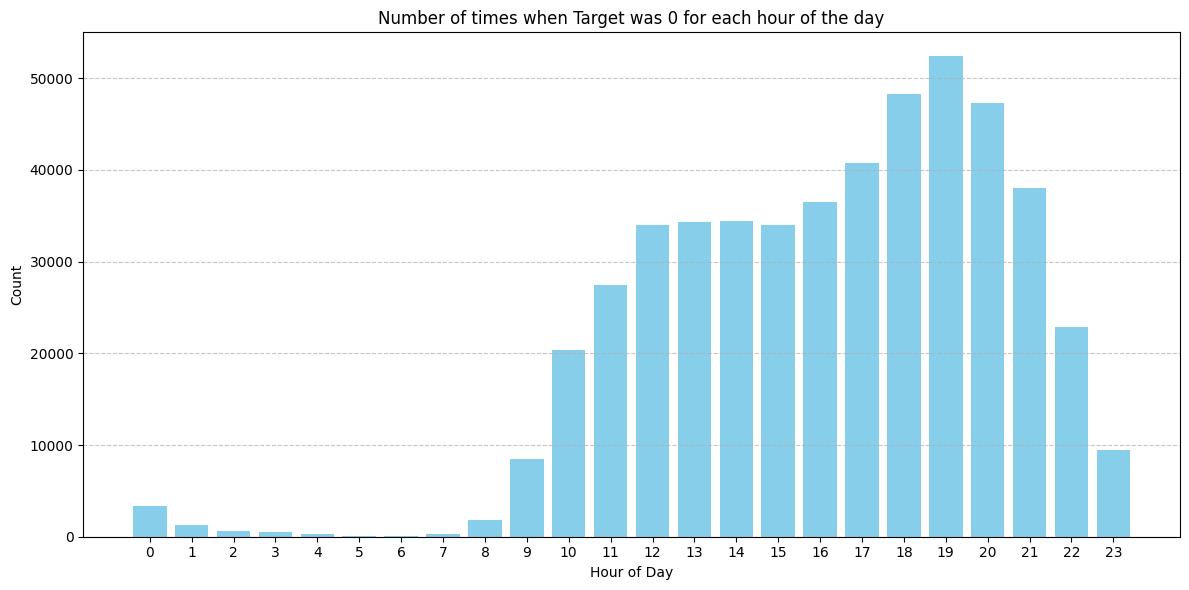

In [36]:
# Convert 'SaleDate' column to datetime if it's not already
orders_df['SaleDate'] = pd.to_datetime(orders_df['SaleDate'])

# Extract the hour component from 'SaleDate'
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour

# Filter rows where 'target' is 0
target_0_df = orders_df[orders_df['target'] == 0]

# Group by 'SaleHour' and count occurrences of 'target' being 0
target_0_per_hour = target_0_df.groupby('SaleHour').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(target_0_per_hour.index, target_0_per_hour.values, color='skyblue')
plt.title('Number of times when Target was 0 for each hour of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### UnitUUId (Restaurant Id)

In [37]:
orders_df['UnitUUId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: UnitUUId
Non-Null Count   Dtype 
--------------   ----- 
611739 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [38]:
num_unique_restaurantIds = orders_df['UnitUUId'].nunique()
print(num_unique_restaurantIds)

784


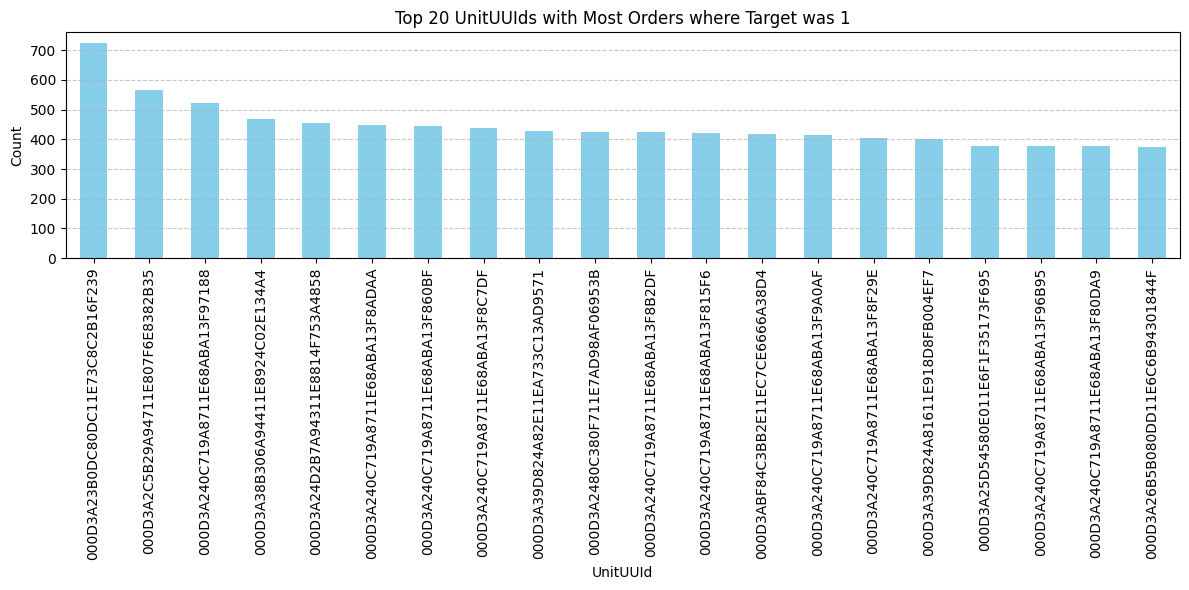

Number of times 'target' was 1 for each UnitUUId:
UnitUUId
000D3A23B0DC80DC11E73C8C2B16F239    724
000D3A2C5B29A94711E807F6E8382B35    567
000D3A240C719A8711E68ABA13F97188    522
000D3A38B306A94411E8924C02E134A4    469
000D3A24D2B7A94311E8814F753A4858    455
                                   ... 
C260520EBBCB9B0D11EDF3C2DC2AAE26      5
000D3ABF84C3BB2E11EC3589DB7CC68E      4
000D3A240C719A8711E68ABA13F91E4B      4
5E928E9D6E51929F11EE2F76C6618CA5      3
F6D6338EA8029D4611EE09674D745734      2
Length: 775, dtype: int64


In [39]:
# Filter rows where 'target' is 1
target_1_df = orders_df[orders_df['target'] == 1]

# Group by 'UnitUUId' and count occurrences of 'target' being 1
target_1_per_unit = target_1_df.groupby('UnitUUId').size().sort_values(ascending=False)

# Plotting the most popular UnitUUIds where 'target' was 1
plt.figure(figsize=(12, 6))
top_n = 20  # Number of top UnitUUIds to plot
target_1_per_unit.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} UnitUUIds with Most Orders where Target was 1')
plt.xlabel('UnitUUId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optionally, print the result
print(f"Number of times 'target' was 1 for each UnitUUId:")
print(target_1_per_unit)

### NewClient

In [40]:
orders_df['NewClient'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: NewClient
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 4.7 MB


C:\Users\user\AppData\Local\Temp\ipykernel_10836\1396391634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='NewClient', palette='Set2')


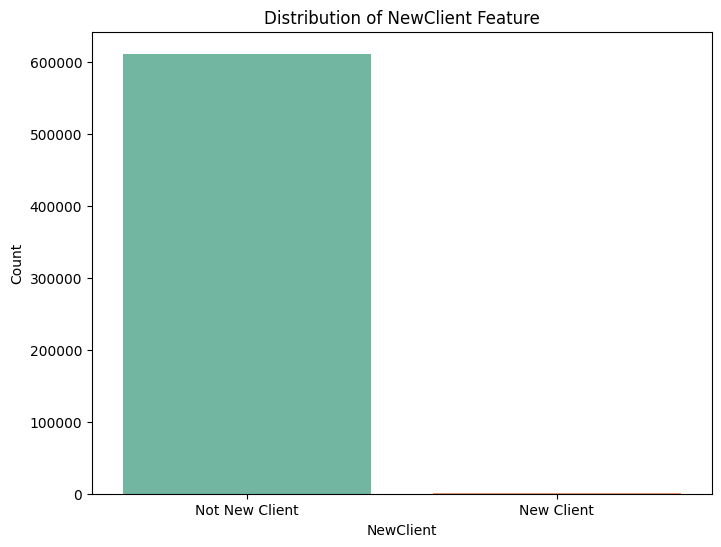

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=orders_df, x='NewClient', palette='Set2')
plt.title('Distribution of NewClient Feature')
plt.xlabel('NewClient')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not New Client', 'New Client'])
plt.show()

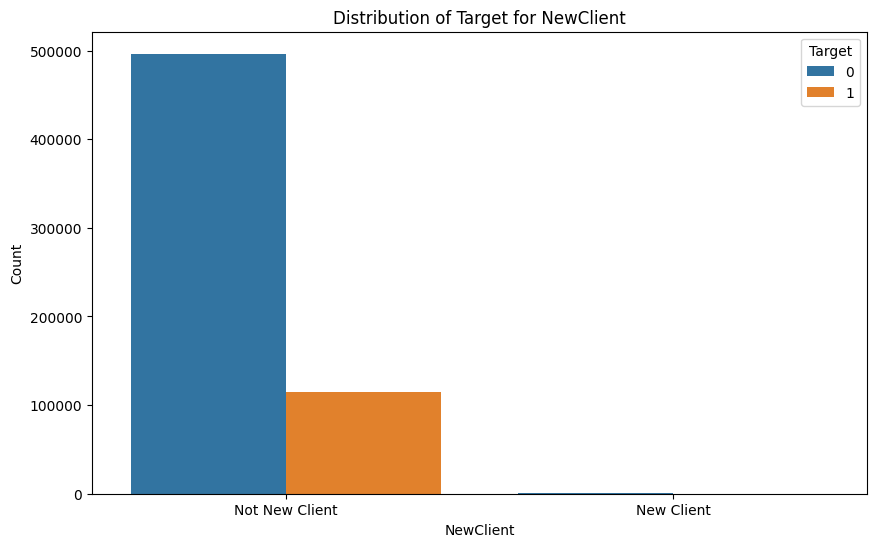

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='NewClient', hue='target')
plt.title('Distribution of Target for NewClient')
plt.xlabel('NewClient')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not New Client', 'New Client'])
plt.legend(title='Target', labels=['0', '1'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10836\2679952246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_clients_df, x='target', palette='Set2')


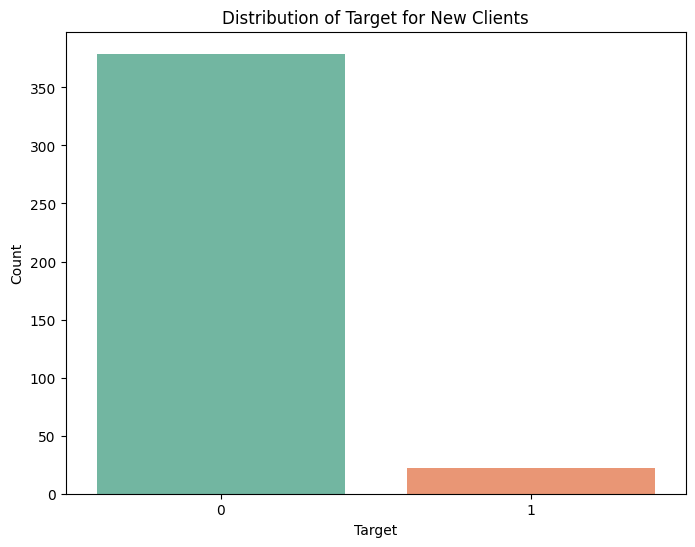

In [43]:
# Filter rows where NewClient is 1
new_clients_df = orders_df[orders_df['NewClient'] == 1]

# Plotting the distribution of target for new clients
plt.figure(figsize=(8, 6))
sns.countplot(data=new_clients_df, x='target', palette='Set2')
plt.title('Distribution of Target for New Clients')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

### ClientOrderNumber

In [44]:
orders_df['ClientOrderNumber'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: ClientOrderNumber
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 4.7 MB


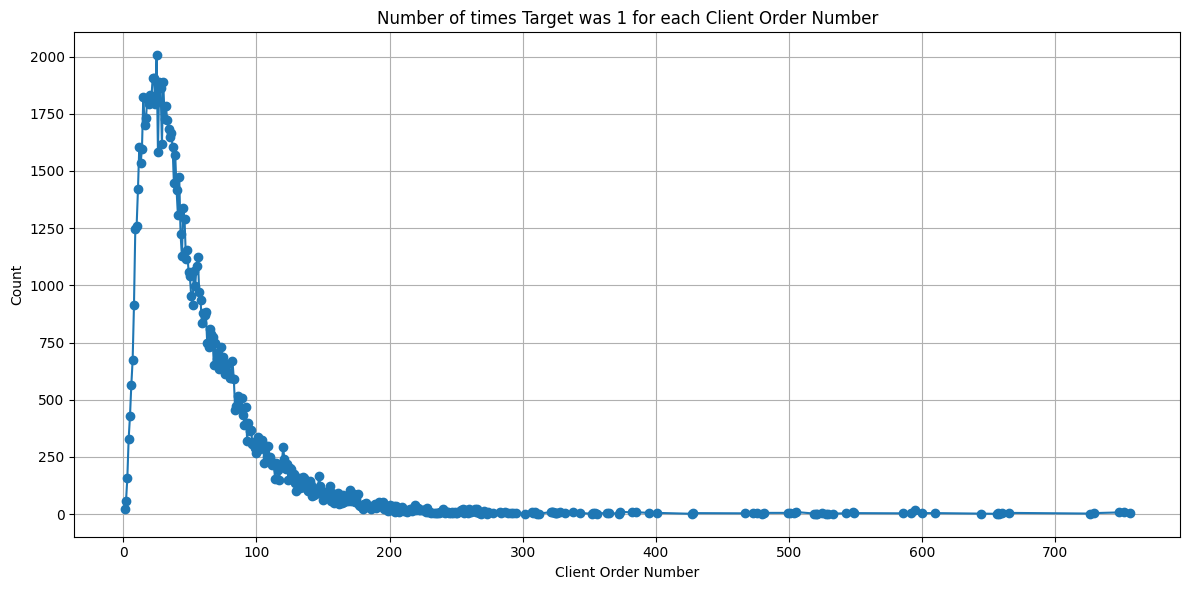

In [45]:
# Group by 'ClientOrderNumber' and count occurrences of 'target' being 1
target_1_per_client_order = orders_df[orders_df['target'] == 1].groupby('ClientOrderNumber').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(target_1_per_client_order.index, target_1_per_client_order.values, marker='o', linestyle='-')
plt.title('Number of times Target was 1 for each Client Order Number')
plt.xlabel('Client Order Number')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### ProductUUId

In [46]:
orders_df['ProductUUId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: ProductUUId
Non-Null Count   Dtype 
--------------   ----- 
611739 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [47]:
unique_product_ids = orders_df['ProductUUId'].unique()
print("Unique values in the 'ProductUUId' column:")
print(len(unique_product_ids))

Unique values in the 'ProductUUId' column:
507


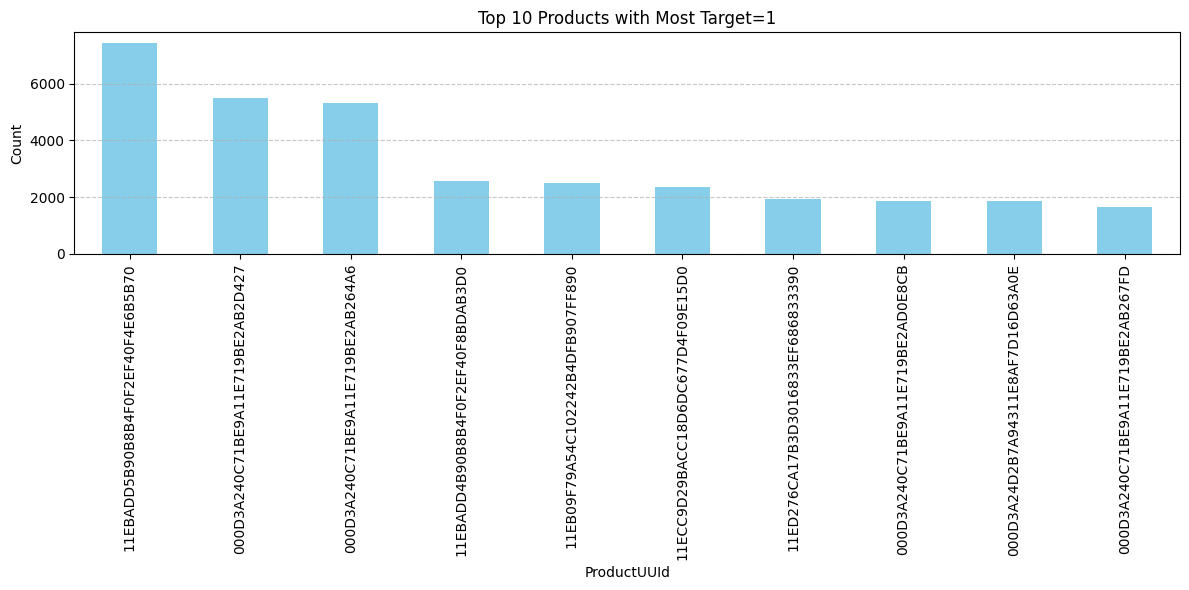

Number of times 'target' was 1 for each ProductUUId:
ProductUUId
11EBADD5B90B8B4F0F2EF40F4E6B5B70    7442
000D3A240C71BE9A11E719BE2AB2D427    5503
000D3A240C71BE9A11E719BE2AB264A6    5335
11EBADD4B90B8B4F0F2EF40F8BDAB3D0    2566
11EB09F79A54C102242B4DFB907FF890    2495
                                    ... 
11EE0EC9BDC71DD5CF1956D0BDCA2120       1
11EDFDAF872E8761E668346F27F0F3C0       1
000D3A240C71BE9A11E719BE2ACA6727       1
11EC113E809923AAD27AA7F3A2174000       1
11EC736C81B5E3B1DFF39808AE086250       1
Length: 423, dtype: int64


In [48]:
# Filter rows where 'target' is 1
target_1_df = orders_df[orders_df['target'] == 1]

# Group by 'ProductUUId' and count occurrences of 'target' being 1
target_1_per_product = target_1_df.groupby('ProductUUId').size().sort_values(ascending=False)

# Plotting the most popular products where 'target' was 1
plt.figure(figsize=(12, 6))
top_n = 10  # Number of top products to plot
target_1_per_product.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Products with Most Target=1')
plt.xlabel('ProductUUId')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optionally, print the result
print(f"Number of times 'target' was 1 for each ProductUUId:")
print(target_1_per_product)

### CategoryId

In [49]:
orders_df['CategoryId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: CategoryId
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 4.7 MB


In [50]:
unique_category_ids = orders_df['CategoryId'].unique()
print("Unique values in the 'ProductUUId' column:")
print(len(unique_category_ids))
unique_category_ids

Unique values in the 'ProductUUId' column:
7


array([4, 1, 3, 2, 5, 6, 7], dtype=int64)

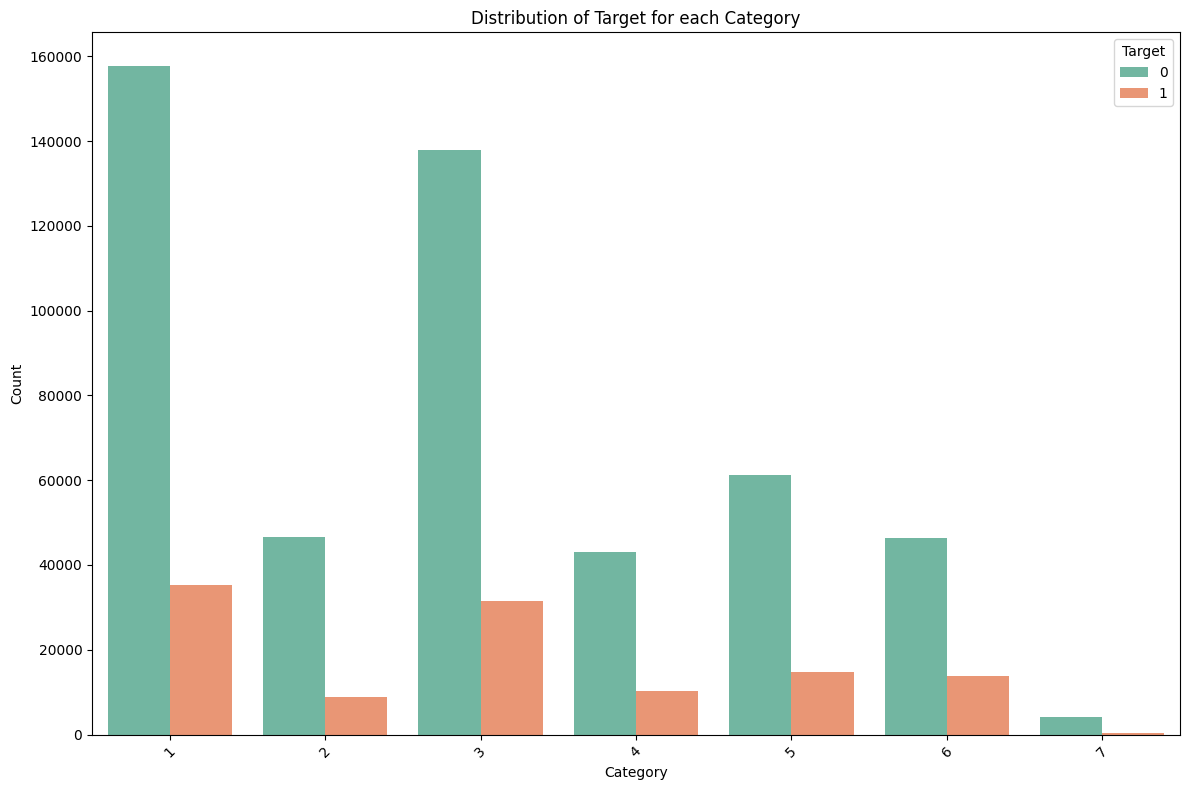

In [51]:
plt.figure(figsize=(12, 8))
sns.countplot(data=orders_df, x='CategoryId', hue='target', palette='Set2')
plt.title('Distribution of Target for each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ProductTotalPrice

In [52]:
orders_df['ProductTotalPrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 611739 entries, 0 to 611738
Series name: ProductTotalPrice
Non-Null Count   Dtype  
--------------   -----  
611739 non-null  float64
dtypes: float64(1)
memory usage: 4.7 MB


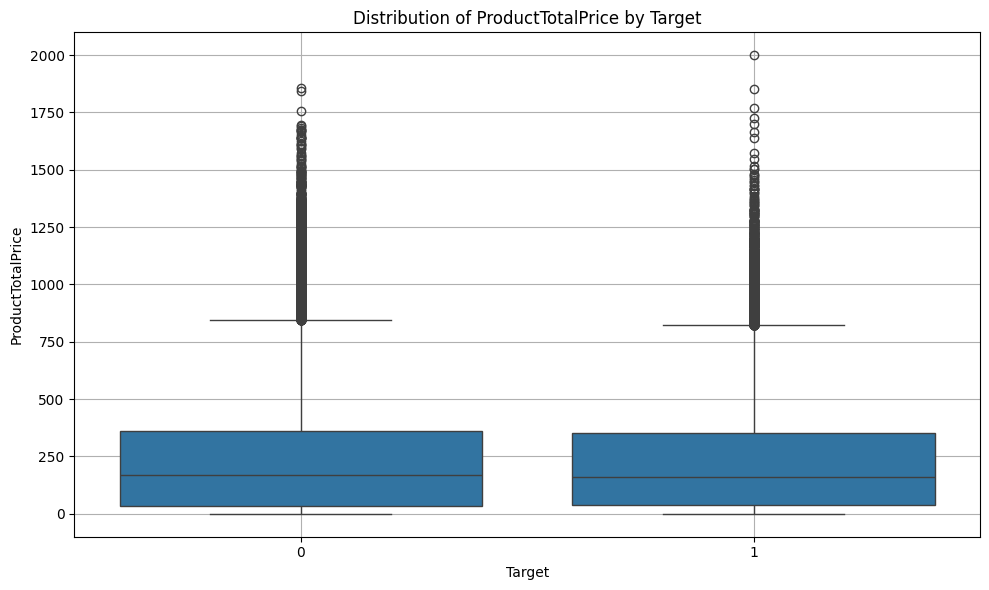

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, x='target', y='ProductTotalPrice')
plt.title('Distribution of ProductTotalPrice by Target')
plt.xlabel('Target')
plt.ylabel('ProductTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10836\244139238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orders_df, x='NewClient', y='ProductTotalPrice', palette='Set2')


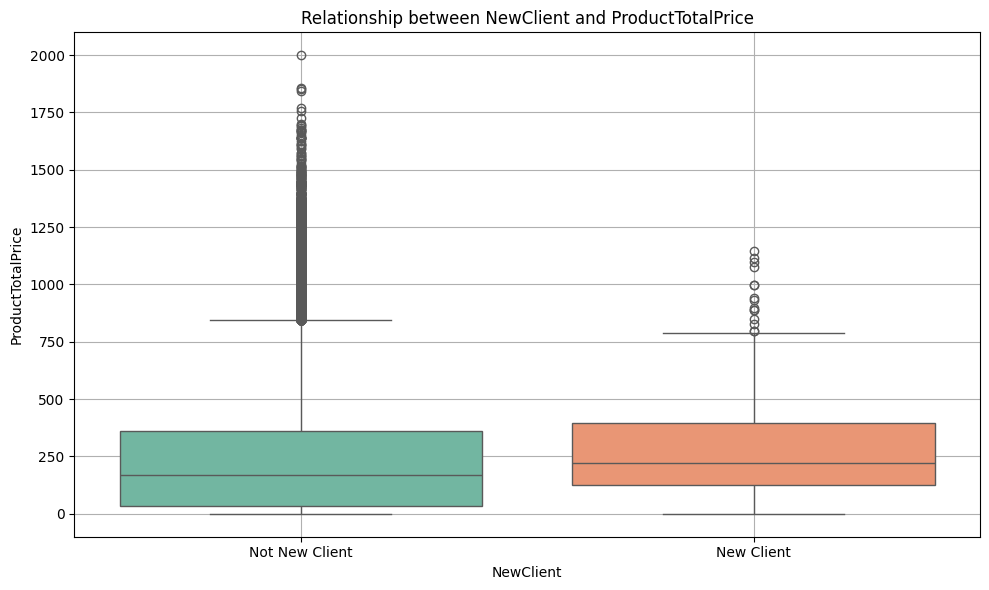

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, x='NewClient', y='ProductTotalPrice', palette='Set2')
plt.title('Relationship between NewClient and ProductTotalPrice')
plt.xlabel('NewClient')
plt.ylabel('ProductTotalPrice')
plt.xticks([0, 1], ['Not New Client', 'New Client'])
plt.grid(True)
plt.tight_layout()
plt.show()

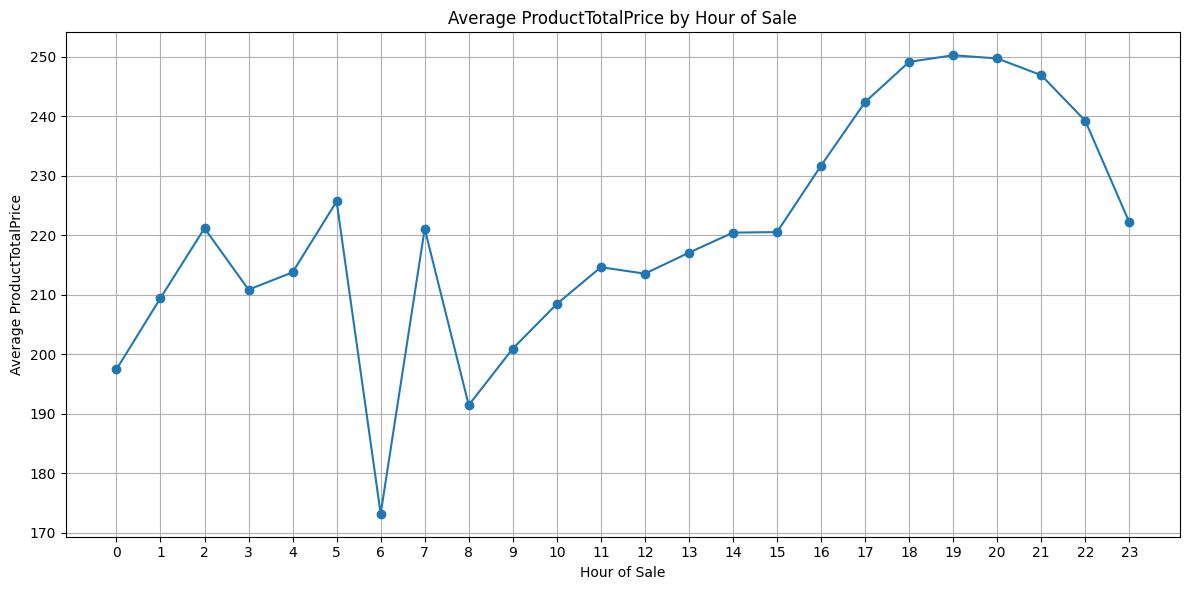

In [55]:
# Extract the hour component from 'SaleDate'
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour

# Calculate average 'ProductTotalPrice' for each hour
avg_price_by_hour = orders_df.groupby('SaleHour')['ProductTotalPrice'].mean()

# Plotting the average 'ProductTotalPrice' for each hour
plt.figure(figsize=(12, 6))
avg_price_by_hour.plot(kind='line', marker='o', linestyle='-')
plt.title('Average ProductTotalPrice by Hour of Sale')
plt.xlabel('Hour of Sale')
plt.ylabel('Average ProductTotalPrice')
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(True)
plt.tight_layout()
plt.show()

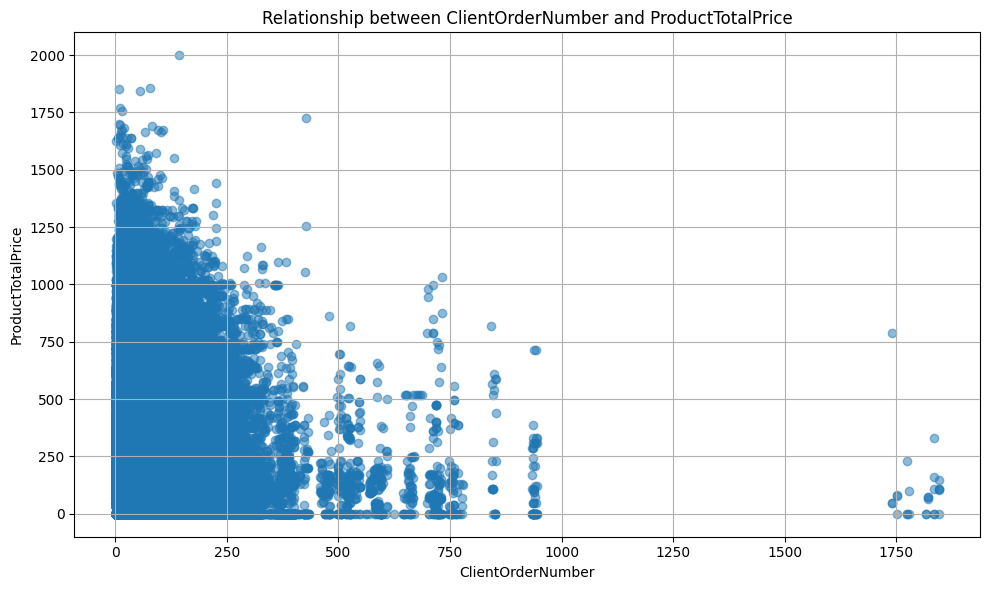

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(orders_df['ClientOrderNumber'], orders_df['ProductTotalPrice'], alpha=0.5)
plt.title('Relationship between ClientOrderNumber and ProductTotalPrice')
plt.xlabel('ClientOrderNumber')
plt.ylabel('ProductTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

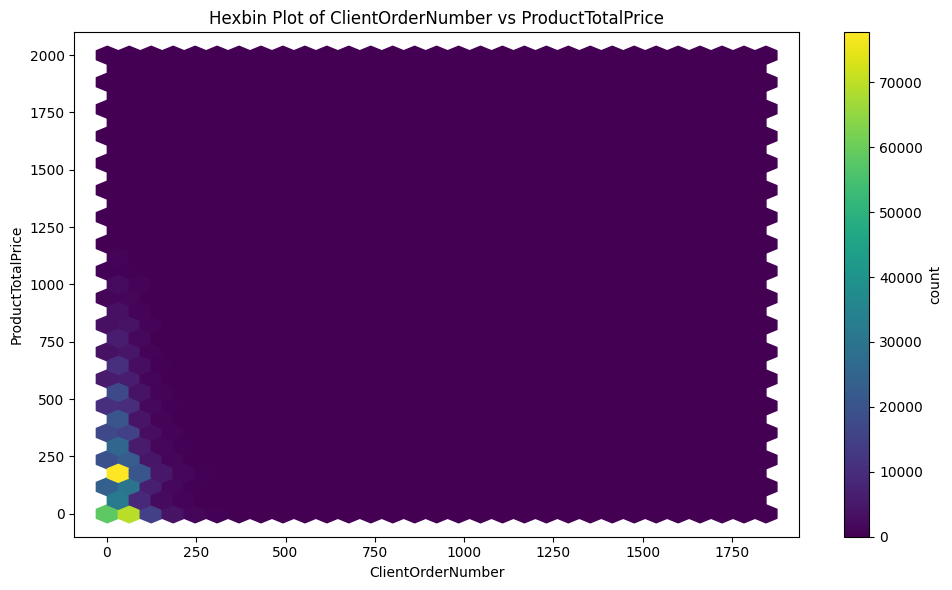

In [57]:
plt.figure(figsize=(10, 6))
plt.hexbin(orders_df['ClientOrderNumber'], orders_df['ProductTotalPrice'], gridsize=30, cmap='viridis')
plt.colorbar(label='count')
plt.title('Hexbin Plot of ClientOrderNumber vs ProductTotalPrice')
plt.xlabel('ClientOrderNumber')
plt.ylabel('ProductTotalPrice')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10836\3189091048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orders_df, x='CategoryId', y='ProductTotalPrice', palette='Set2')


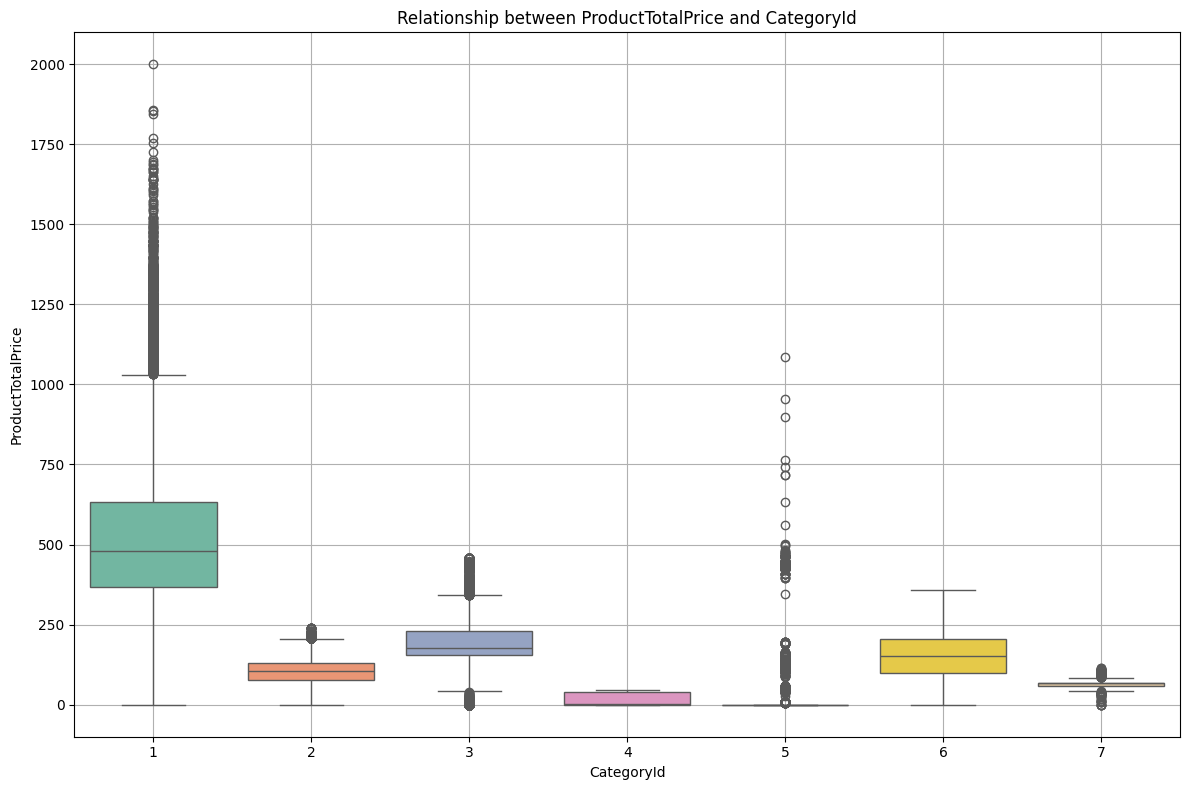

In [58]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=orders_df, x='CategoryId', y='ProductTotalPrice', palette='Set2')
plt.title('Relationship between ProductTotalPrice and CategoryId')
plt.xlabel('CategoryId')
plt.ylabel('ProductTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

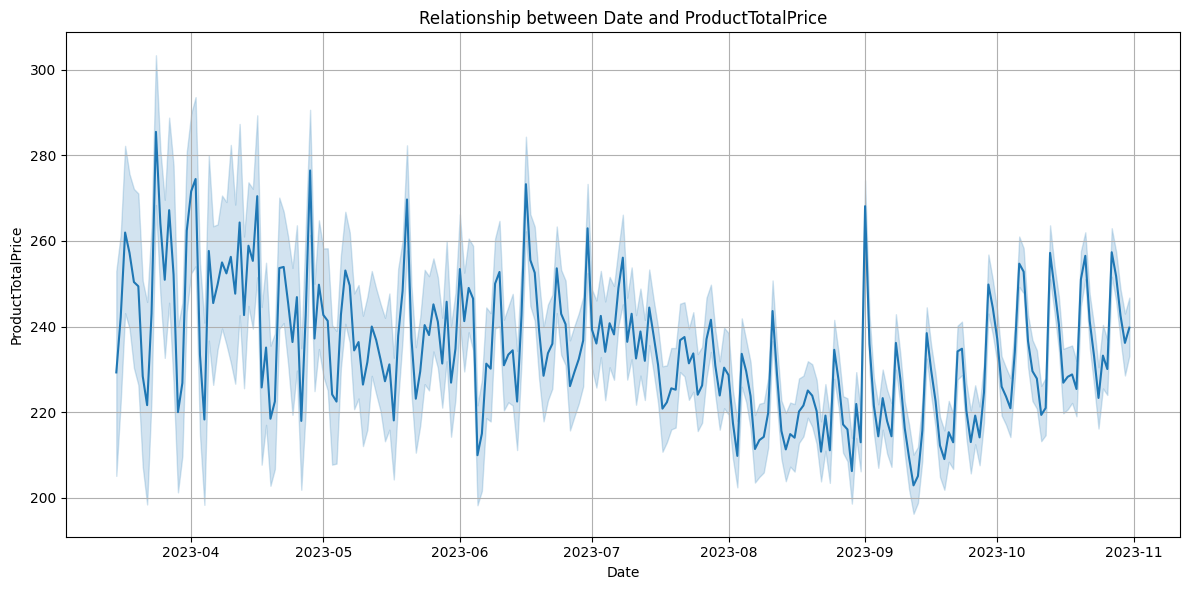

In [59]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_df, x='Date', y='ProductTotalPrice')
plt.title('Relationship between Date and ProductTotalPrice')
plt.xlabel('Date')
plt.ylabel('ProductTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

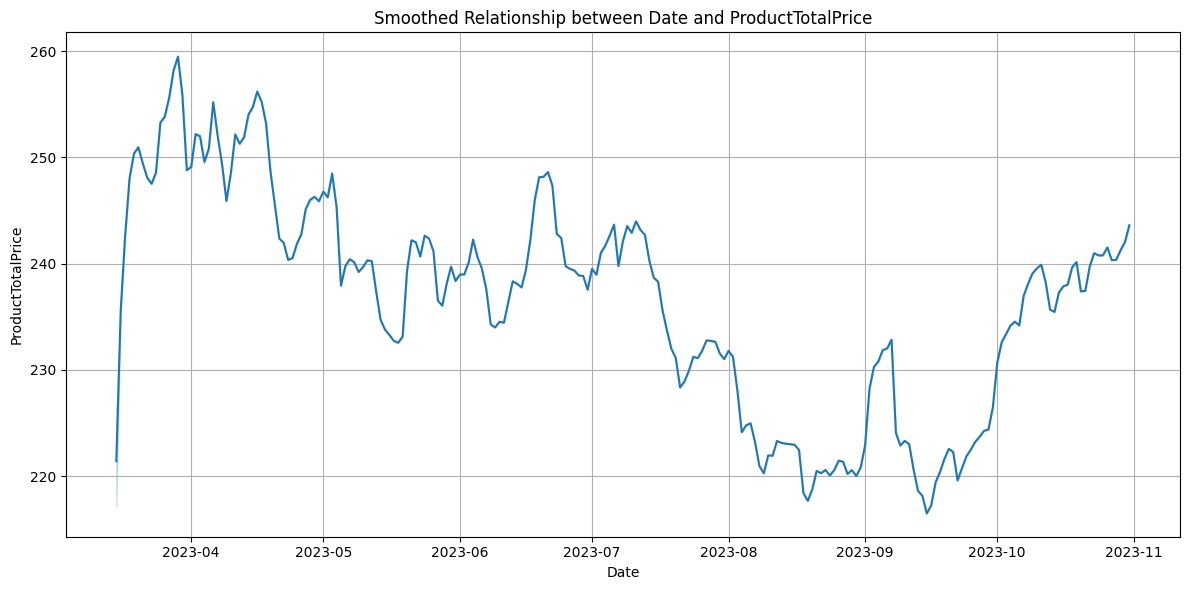

In [60]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Sort DataFrame by 'Date' if not already sorted
orders_df = orders_df.sort_values(by='Date')

# Apply a rolling average with a window of 7 days (adjust as needed)
orders_df_smooth = orders_df.set_index('Date').rolling('7D')['ProductTotalPrice'].mean().reset_index()

# Plotting a line plot with smoothed data
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_df_smooth, x='Date', y='ProductTotalPrice')
plt.title('Smoothed Relationship between Date and ProductTotalPrice')
plt.xlabel('Date')
plt.ylabel('ProductTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

### MenuPrice

In [61]:
orders_df['MenuPrice'].info()

<class 'pandas.core.series.Series'>
Index: 611739 entries, 171387 to 387650
Series name: MenuPrice
Non-Null Count   Dtype  
--------------   -----  
611739 non-null  float64
dtypes: float64(1)
memory usage: 9.3 MB


C:\Users\user\AppData\Local\Temp\ipykernel_10836\3052470988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orders_df, x='target', y='MenuPrice', palette='Set2')


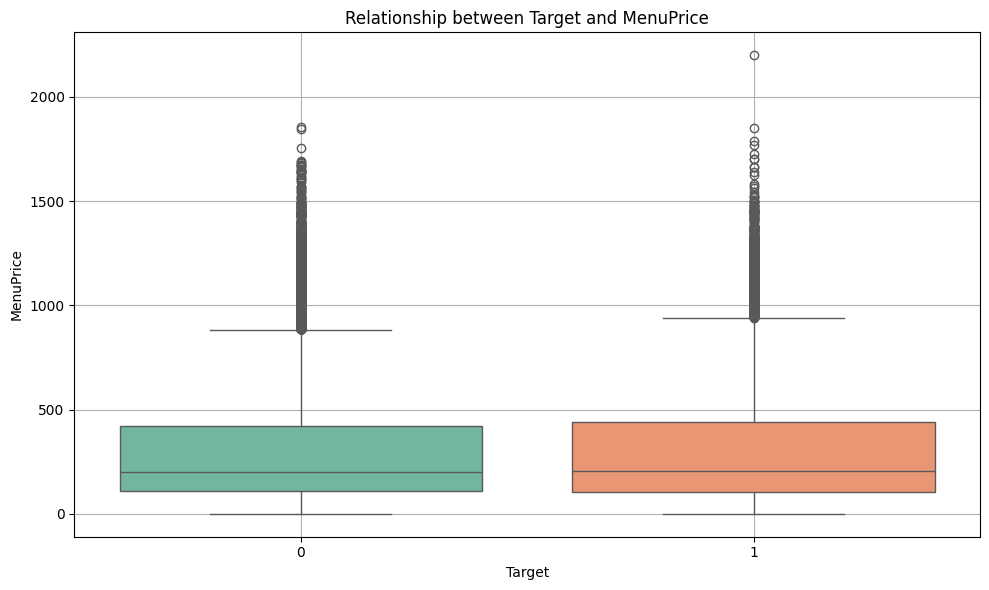

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, x='target', y='MenuPrice', palette='Set2')
plt.title('Relationship between Target and MenuPrice')
plt.xlabel('Target')
plt.ylabel('MenuPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

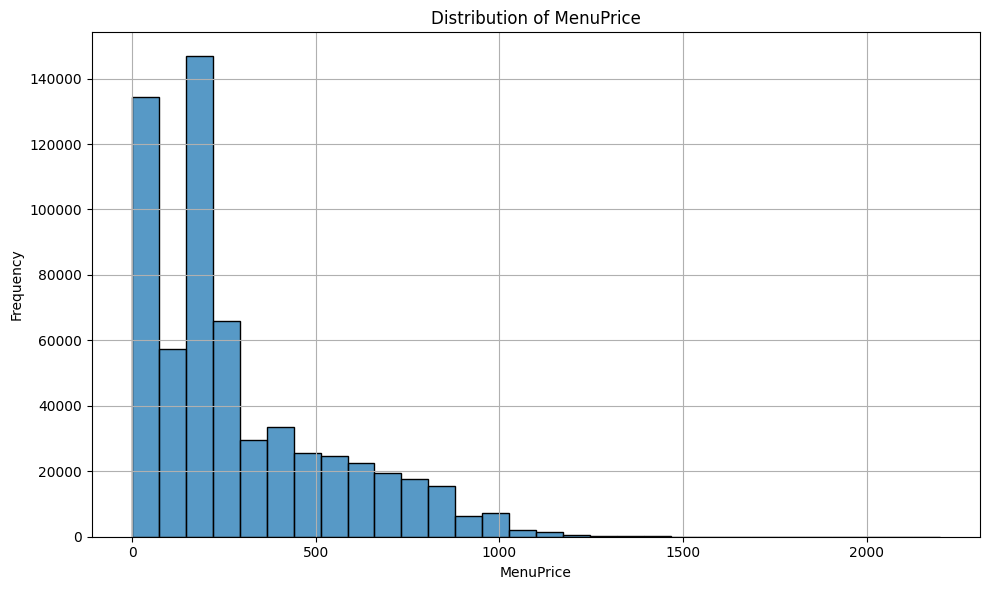

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['MenuPrice'], bins=30, kde=False)
plt.title('Distribution of MenuPrice')
plt.xlabel('MenuPrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### OrderState

In [64]:
orders_df['OrderState'].info()

<class 'pandas.core.series.Series'>
Index: 611739 entries, 171387 to 387650
Series name: OrderState
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 9.3 MB


In [65]:
unique_state_ids = orders_df['OrderState'].unique()
print("Unique values in the 'OrderState' column:")
print(len(unique_state_ids))
unique_state_ids

Unique values in the 'OrderState' column:
2


array([ 4, 11], dtype=int64)

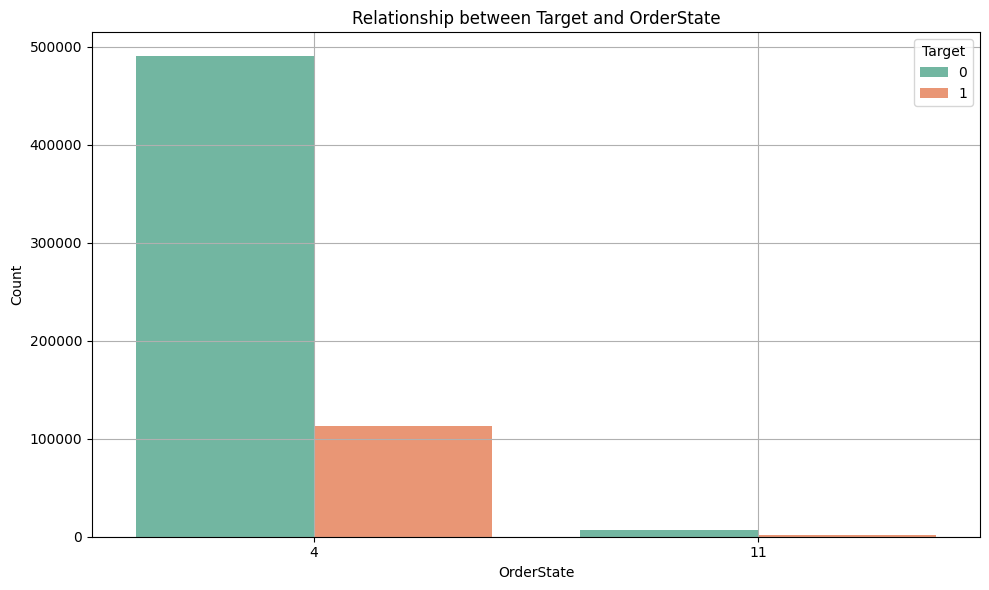

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='OrderState', hue='target', palette='Set2')
plt.title('Relationship between Target and OrderState')
plt.xlabel('OrderState')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.grid(True)
plt.tight_layout()
plt.show()

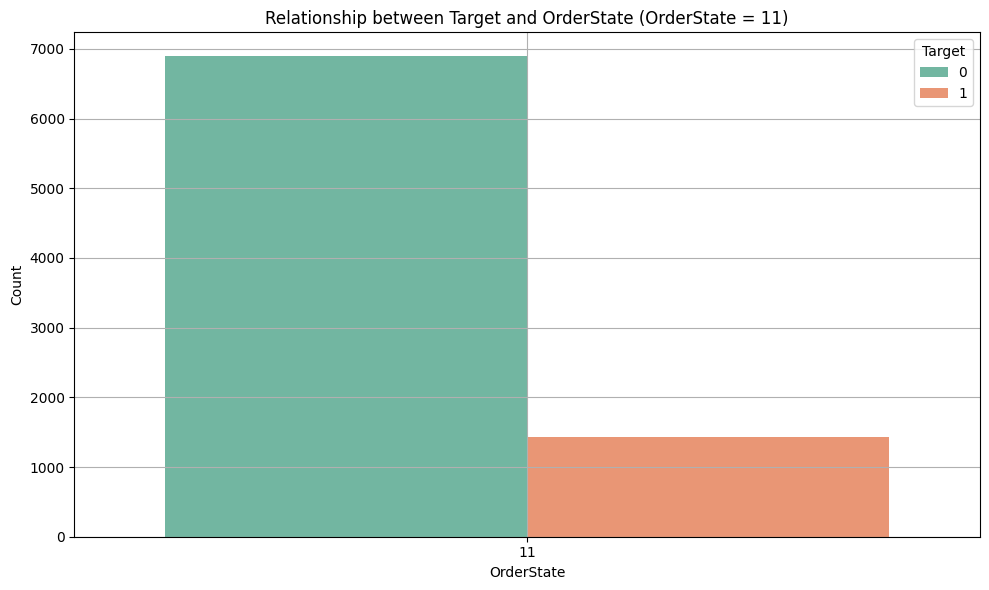

In [67]:
filtered_df = orders_df[orders_df['OrderState'] == 11]

# Plotting a count plot for the filtered data
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='OrderState', hue='target', palette='Set2')
plt.title('Relationship between Target and OrderState (OrderState = 11)')
plt.xlabel('OrderState')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.grid(True)
plt.tight_layout()
plt.show()

### OrderPaymentType

In [68]:
orders_df['OrderPaymentType'].info()

<class 'pandas.core.series.Series'>
Index: 611739 entries, 171387 to 387650
Series name: OrderPaymentType
Non-Null Count   Dtype
--------------   -----
611739 non-null  int64
dtypes: int64(1)
memory usage: 9.3 MB


In [69]:
unique_payments = orders_df['OrderPaymentType'].unique()
print("Unique values in the 'OrderPaymentType' column:")
print(len(unique_payments))
unique_payments

Unique values in the 'OrderPaymentType' column:
3


array([2, 0, 1], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_10836\1718581808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='OrderPaymentType', palette='Set2')


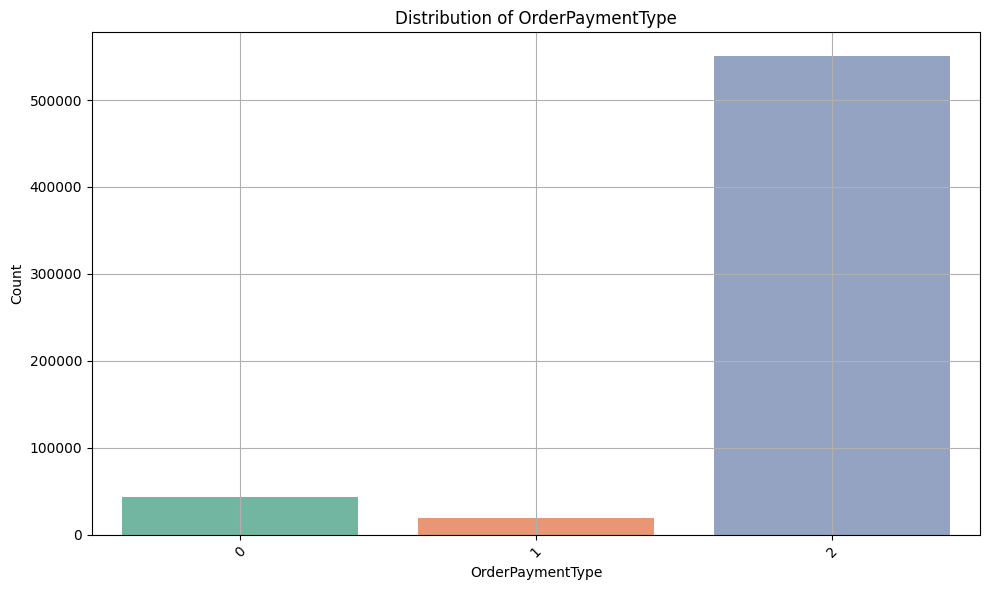

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='OrderPaymentType', palette='Set2')
plt.title('Distribution of OrderPaymentType')
plt.xlabel('OrderPaymentType')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability if there are many categories
plt.grid(True)
plt.tight_layout()
plt.show()

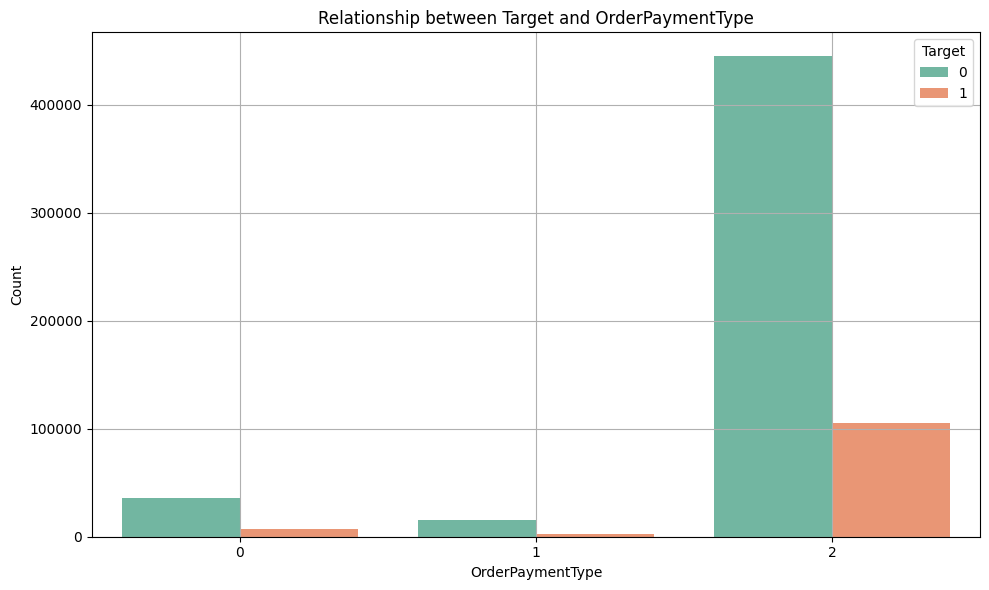

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='OrderPaymentType', hue='target', palette='Set2')
plt.title('Relationship between Target and OrderPaymentType')
plt.xlabel('OrderPaymentType')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.grid(True)
plt.tight_layout()
plt.show()

### OrderTotalPrice

In [72]:
orders_df['OrderTotalPrice'].info()

<class 'pandas.core.series.Series'>
Index: 611739 entries, 171387 to 387650
Series name: OrderTotalPrice
Non-Null Count   Dtype  
--------------   -----  
611739 non-null  float64
dtypes: float64(1)
memory usage: 9.3 MB


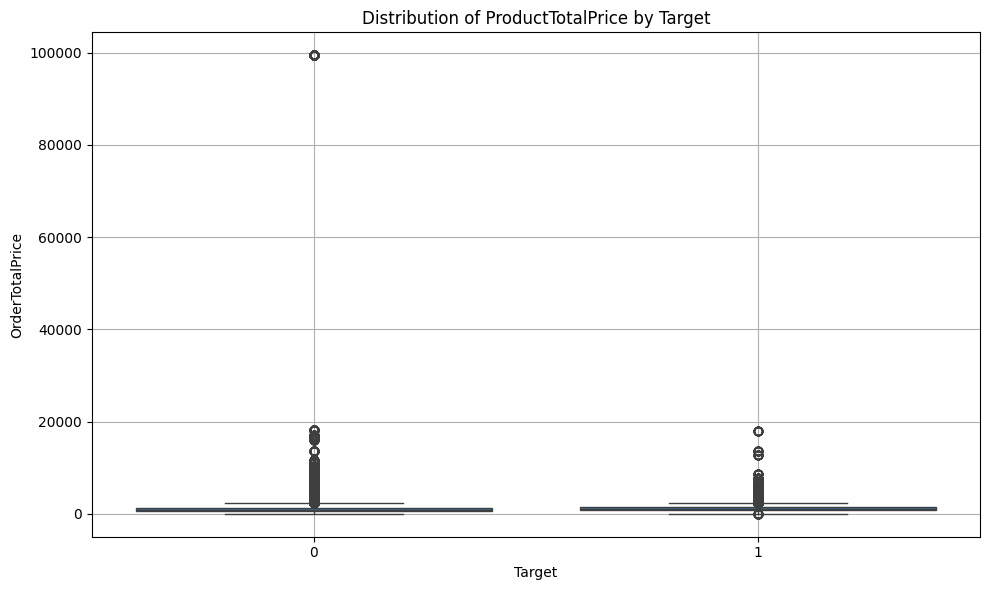

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, x='target', y='OrderTotalPrice')
plt.title('Distribution of ProductTotalPrice by Target')
plt.xlabel('Target')
plt.ylabel('OrderTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

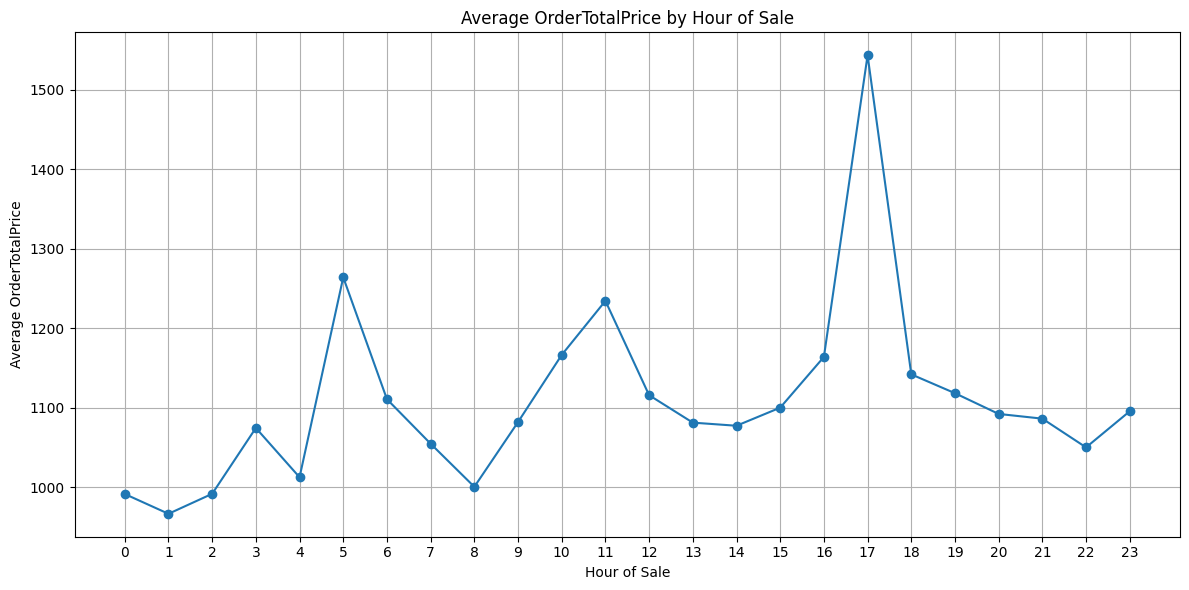

In [74]:
# Extract the hour component from 'SaleDate'
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour

# Calculate average 'ProductTotalPrice' for each hour
avg_price_by_hour = orders_df.groupby('SaleHour')['OrderTotalPrice'].mean()

# Plotting the average 'ProductTotalPrice' for each hour
plt.figure(figsize=(12, 6))
avg_price_by_hour.plot(kind='line', marker='o', linestyle='-')
plt.title('Average OrderTotalPrice by Hour of Sale')
plt.xlabel('Hour of Sale')
plt.ylabel('Average OrderTotalPrice')
plt.xticks(range(24))  # Ensure all hours are displayed
plt.grid(True)
plt.tight_layout()
plt.show()

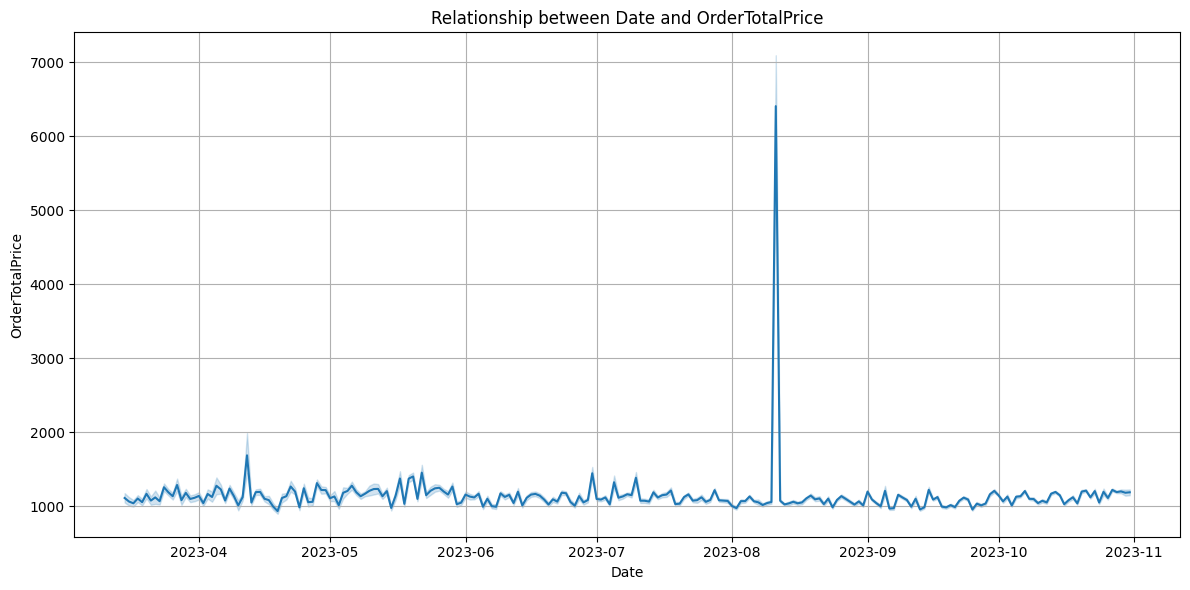

In [75]:
# Convert 'Date' column to datetime if it's not already
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_df, x='Date', y='OrderTotalPrice')
plt.title('Relationship between Date and OrderTotalPrice')
plt.xlabel('Date')
plt.ylabel('OrderTotalPrice')
plt.grid(True)
plt.tight_layout()
plt.show()

### OrderType

In [76]:
unique_order_types = orders_df['OrderType'].unique()
print("Unique values in the 'OrderType' column:")
print(len(unique_order_types))
unique_order_types

Unique values in the 'OrderType' column:
3


array([1, 3, 2], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_10836\2682086879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='OrderType', palette='Set2')


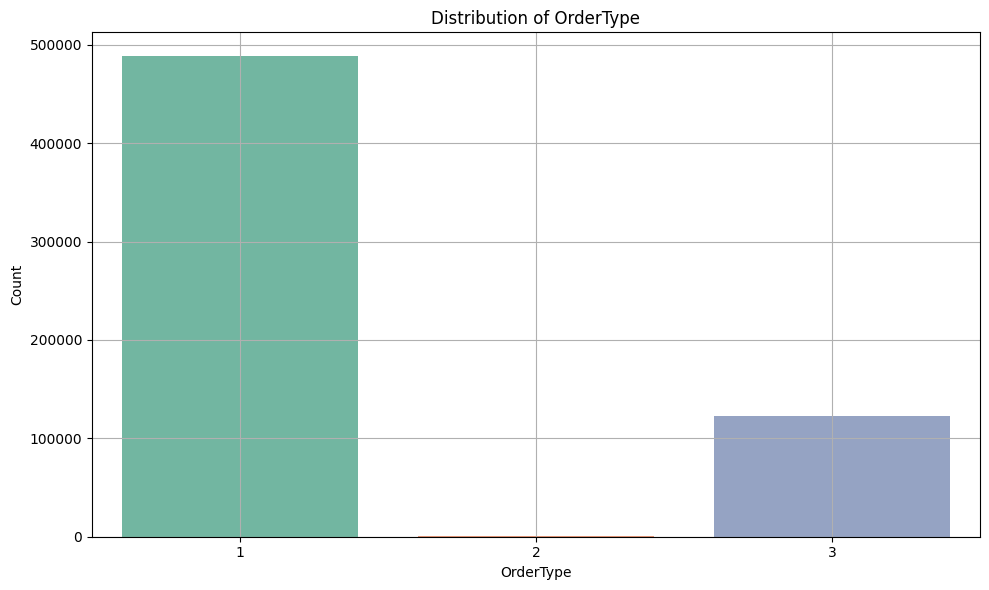

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='OrderType', palette='Set2')
plt.title('Distribution of OrderType')
plt.xlabel('OrderType')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

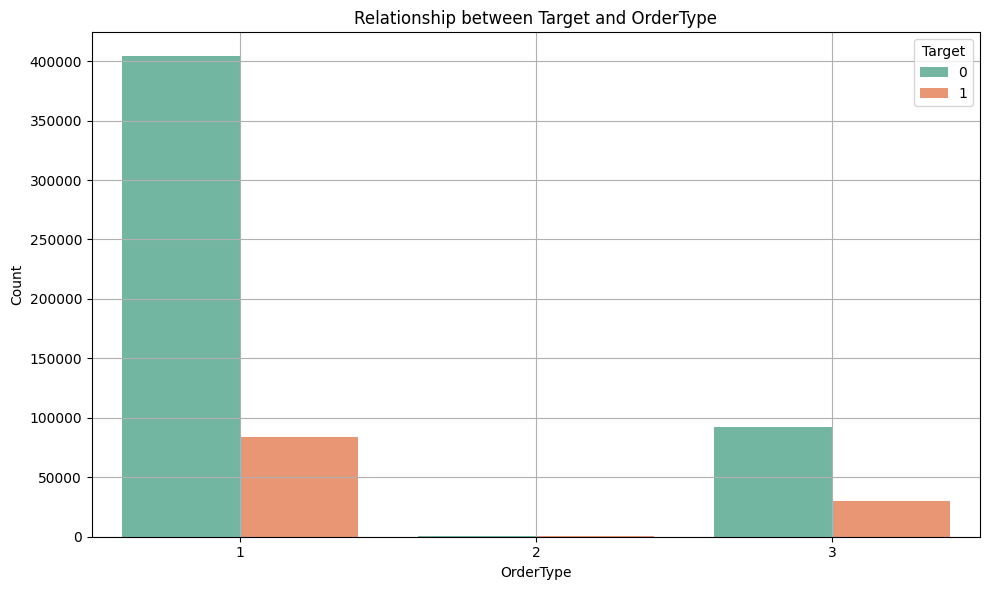

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df, x='OrderType', hue='target', palette='Set2')
plt.title('Relationship between Target and OrderType')
plt.xlabel('OrderType')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.grid(True)
plt.tight_layout()
plt.show()

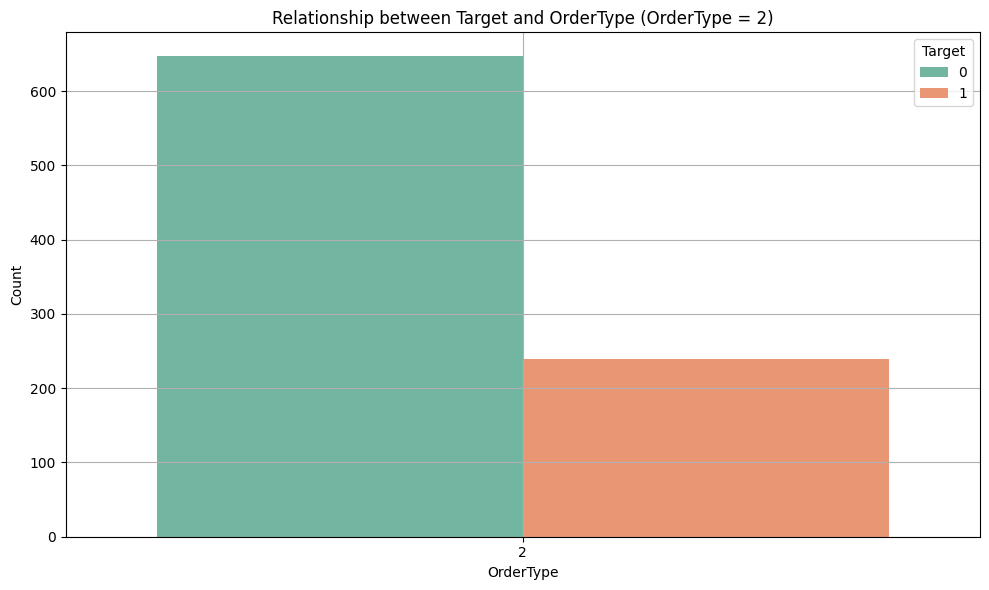

In [79]:
# Filter the dataframe for OrderType == 2
orders_df_order_type_2 = orders_df[orders_df['OrderType'] == 2]

# Plotting a count plot for OrderType == 2 with 'target' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_df_order_type_2, x='OrderType', hue='target', palette='Set2')
plt.title('Relationship between Target and OrderType (OrderType = 2)')
plt.xlabel('OrderType')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0', '1'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Encoding categorical features

In [80]:
# Convert 'Date' column to datetime
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

# Add a new feature for the day of the week
orders_df['DayOfWeek'] = orders_df['Date'].dt.dayofweek

# Optionally, map the day of week to day names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
orders_df['DayName'] = orders_df['DayOfWeek'].map(day_name_map)

### Day of the week analysis

C:\Users\user\AppData\Local\Temp\ipykernel_10836\855016558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_per_day.index, y=average_price_per_day.values, palette='viridis')


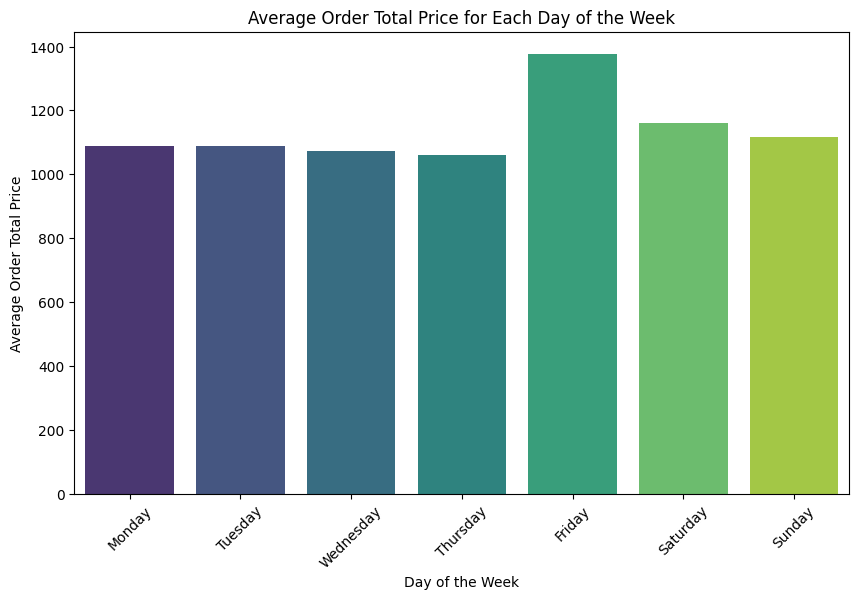

In [81]:
# Group by 'DayName' and calculate the mean 'OrderTotalPrice'
average_price_per_day = orders_df.groupby('DayName')['OrderTotalPrice'].mean().reindex(day_name_map.values())

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_per_day.index, y=average_price_per_day.values, palette='viridis')
plt.title('Average Order Total Price for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Order Total Price')
plt.xticks(rotation=45)
plt.show()

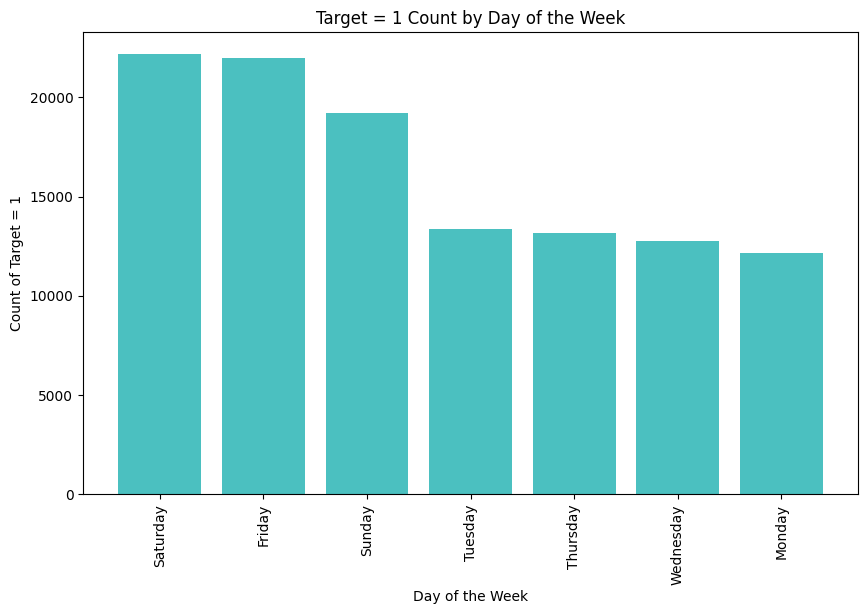

In [82]:
day_target_counts = orders_df.groupby('DayName')['target'].sum().sort_values(ascending=False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.bar(day_target_counts.index, day_target_counts.values, color='#4bc0c0')

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count of Target = 1')
ax.set_title('Target = 1 Count by Day of the Week')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [83]:
# Convert the 'SaleDate' column to datetime
orders_df['SaleDate'] = pd.to_datetime(orders_df['SaleDate'])

# Extracting components
orders_df['SaleMonth'] = orders_df['SaleDate'].dt.month
orders_df['SaleDay'] = orders_df['SaleDate'].dt.day
orders_df['SaleHour'] = orders_df['SaleDate'].dt.hour


orders_df.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,Date,SaleDate,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,...,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,target,SaleHour,DayOfWeek,DayName,SaleMonth,SaleDay
171387,1E44BFAF4193B20511EDB797C8C105C2,10638114.0,4314.0,000D3AAC977BBB2D11EC2F480FB431CF,2023-03-15,2023-03-15 23:24:34+00:00,000D3A39D824A82E11EAE1DCE4F26A25,0,3,11EBADD5B90B8B4F0F2EF40F4E6B5B70,...,4,2,518.0,1,0,23,2,Wednesday,3,15
9466,92FFEDDE173EB61311EDC30001CD9FBC,6615366.0,368.0,000D3A39D824A82E11EAD0B8AA466E4A,2023-03-15,2023-03-15 17:05:37+00:00,000D3A240C719A8711E68ABA13F8CABA,0,32,11EBADD5B90B8B4F0F2EF40F4E6B5B70,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9467,92FFEDDE173EB61311EDC30001CD9FBC,6615366.0,368.0,000D3A39D824A82E11EAD0B8AA466E4A,2023-03-15,2023-03-15 17:05:37+00:00,000D3A240C719A8711E68ABA13F8CABA,0,32,000D3A24D2B7A94311E8CBCCC0C49FB6,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9468,92FFEDDE173EB61311EDC30001CD9FBC,6615366.0,368.0,000D3A39D824A82E11EAD0B8AA466E4A,2023-03-15,2023-03-15 17:05:37+00:00,000D3A240C719A8711E68ABA13F8CABA,0,32,000D3A38B306A94411E8C169ACAB805C,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9469,92FFEDDE173EB61311EDC30001CD9FBC,6615366.0,368.0,000D3A39D824A82E11EAD0B8AA466E4A,2023-03-15,2023-03-15 17:05:37+00:00,000D3A240C719A8711E68ABA13F8CABA,0,32,000D3A240C71BE9A11E719BE2AB264A6,...,4,0,350.0,1,0,17,2,Wednesday,3,15


In [84]:
orders_df = orders_df.drop('Date', axis=1)
orders_df = orders_df.drop('SaleDate', axis=1)

In [85]:
# Ensure all ClientUUId values are strings
orders_df['ClientUUId'] = orders_df['ClientUUId'].astype(str)
mobile_events_df['ClientUUId'] = mobile_events_df['ClientUUId'].astype(str)
clients_promo_october_df['ClientUUId'] = clients_promo_october_df['ClientUUId'].astype(str)
train_target_df['ClientUUId'] = train_target_df['ClientUUId'].astype(str)
test_df['ClientUUId'] = test_df['ClientUUId'].astype(str)
orders_df['OrderUUId'] = orders_df['OrderUUId'].astype(str)

# Combine unique ClientUUId values from all DataFrames
unique_client_ids = pd.concat([
    orders_df['ClientUUId'],
    mobile_events_df['ClientUUId'],
    clients_promo_october_df['ClientUUId'],
    train_target_df['ClientUUId'],
    test_df['ClientUUId']
]).unique()

# Initialize the LabelEncoder
client_uuid_encoder = LabelEncoder()
order_uuid_encoder = LabelEncoder()
unit_uuid_encoder = LabelEncoder()
product_uuid_encoder = LabelEncoder()

# Fit the encoder on the combined unique values
client_uuid_encoder.fit(unique_client_ids)
order_uuid_encoder.fit(orders_df['OrderUUId'])
unit_uuid_encoder.fit(orders_df['UnitUUId'])
product_uuid_encoder.fit(orders_df['ProductUUId'])

# Transform the ClientUUId in all DataFrames
orders_df['ClientUUId'] = client_uuid_encoder.transform(orders_df['ClientUUId'])
mobile_events_df['ClientUUId'] = client_uuid_encoder.transform(mobile_events_df['ClientUUId'])
clients_promo_october_df['ClientUUId'] = client_uuid_encoder.transform(clients_promo_october_df['ClientUUId'])
train_target_df['ClientUUId'] = client_uuid_encoder.transform(train_target_df['ClientUUId'])
test_df['ClientUUId'] = client_uuid_encoder.transform(test_df['ClientUUId'])

# Transform OrderUUId, UnitUUId, ProductUUId in orders_df
orders_df['OrderUUId'] = order_uuid_encoder.transform(orders_df['OrderUUId'])
orders_df['UnitUUId'] = unit_uuid_encoder.transform(orders_df['UnitUUId'])
orders_df['ProductUUId'] = product_uuid_encoder.transform(orders_df['ProductUUId'])

In [86]:
orders_df.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,...,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,target,SaleHour,DayOfWeek,DayName,SaleMonth,SaleDay
171387,17606,10638114.0,4314.0,18828,590,0,3,204,5,0.0,...,4,2,518.0,1,0,23,2,Wednesday,3,15
9466,91698,6615366.0,368.0,16924,213,0,32,204,5,0.0,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9467,91698,6615366.0,368.0,16924,213,0,32,113,6,1.0,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9468,91698,6615366.0,368.0,16924,213,0,32,137,5,10.0,...,4,0,350.0,1,0,17,2,Wednesday,3,15
9469,91698,6615366.0,368.0,16924,213,0,32,57,4,40.0,...,4,0,350.0,1,0,17,2,Wednesday,3,15


In [87]:
orders_df = orders_df.drop('DayName', axis=1)

In [88]:
orders_df.head()

,OrderUUId,addressId,deliverySectorId,ClientUUId,UnitUUId,NewClient,ClientOrderNumber,ProductUUId,CategoryId,ProductTotalPrice,MenuPrice,OrderState,OrderPaymentType,OrderTotalPrice,OrderType,target,SaleHour,DayOfWeek,SaleMonth,SaleDay
171387,17606,10638114.0,4314.0,18828,590,0,3,204,5,0.0,0.0,4,2,518.0,1,0,23,2,3,15
9466,91698,6615366.0,368.0,16924,213,0,32,204,5,0.0,0.0,4,0,350.0,1,0,17,2,3,15
9467,91698,6615366.0,368.0,16924,213,0,32,113,6,1.0,205.0,4,0,350.0,1,0,17,2,3,15
9468,91698,6615366.0,368.0,16924,213,0,32,137,5,10.0,10.0,4,0,350.0,1,0,17,2,3,15
9469,91698,6615366.0,368.0,16924,213,0,32,57,4,40.0,40.0,4,0,350.0,1,0,17,2,3,15


### Correlation matrix

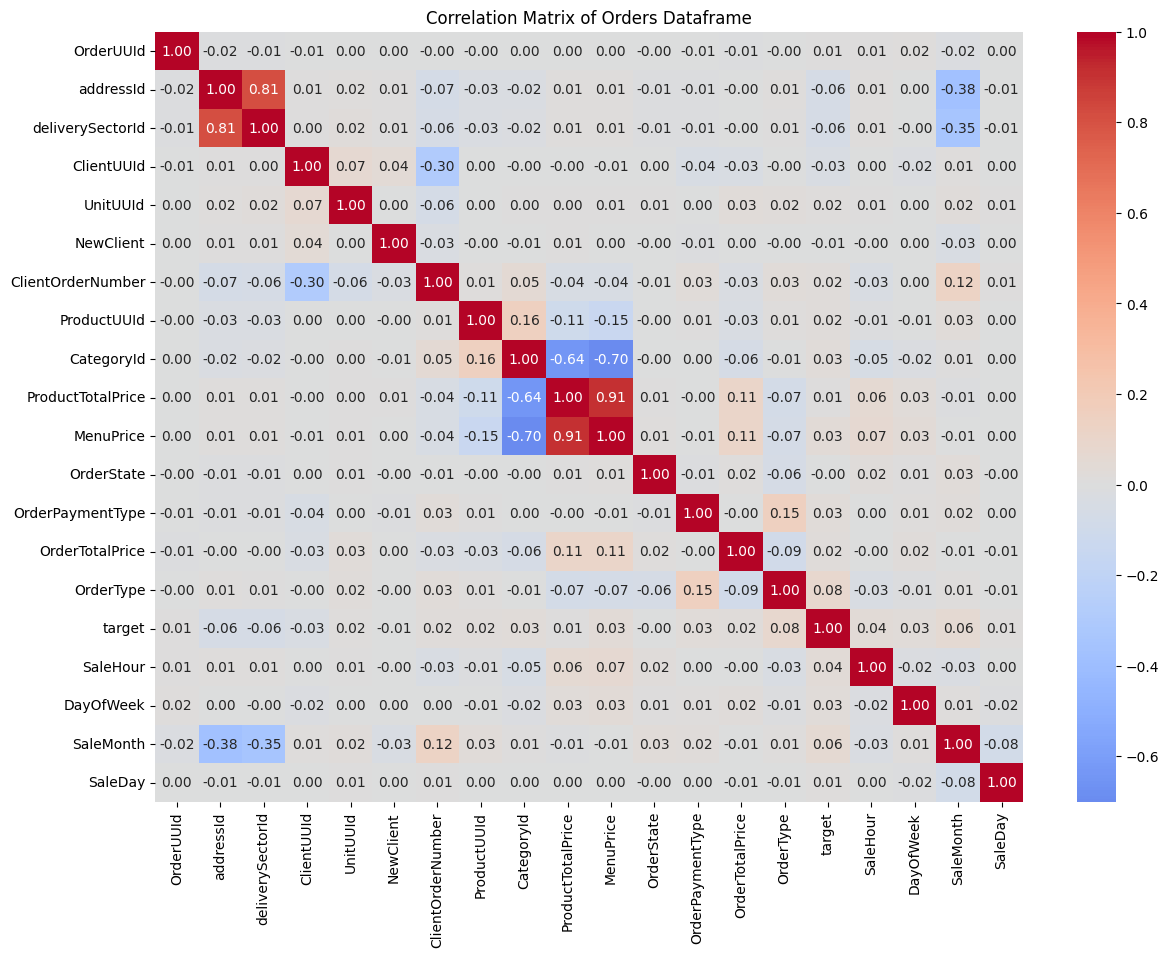

In [89]:
# Compute the correlation matrix
corr_matrix = orders_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Orders Dataframe')
plt.show()

### Dealing with NaNs

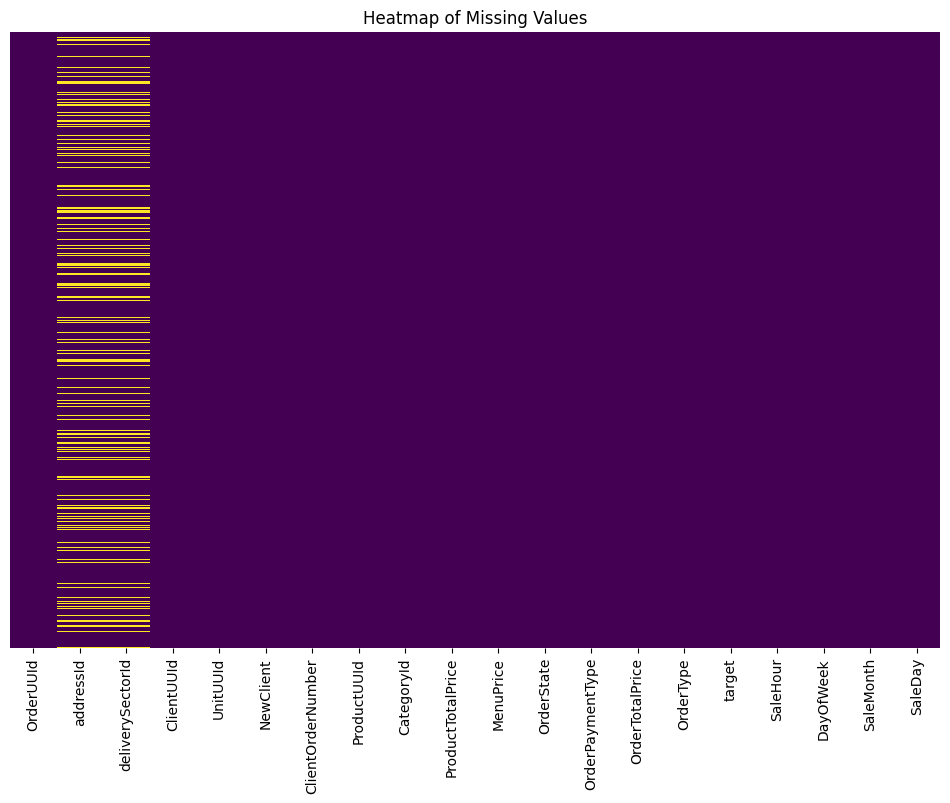

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(orders_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [91]:
orders_df['addressId'] = orders_df['addressId'].fillna(0.0)
orders_df['deliverySectorId'] = orders_df['deliverySectorId'].fillna(0.0)

## Mobile events

In [92]:
mobile_events_df.head()

,ClientUUId,VisitToken,EventName,Platform,Timestamp
0,6861,976627AD-76DC-41D9-981E-F2A6CA14B3A9,screen_menu,ios,2023-10-29T16:14:21.343Z
1,25615,5b22e610-c71e-4b6a-a842-71e8575ece87,screen_menu,android,2023-10-29T11:04:36.4840000Z
2,19779,BDCEB72F-2B6A-4565-801A-6CB729279C6F,open_app,ios,2023-10-29T11:14:34.723Z
3,2766,A66E2DA6-4E2E-4C37-9FBF-627732623212,add_to_cart,ios,2023-10-29T14:03:08.363Z
4,7155,1BE8139F-A3D3-439F-A51B-5CBD4D3FFF1B,screen_menu,ios,2023-10-29T08:35:40.127Z


In [93]:
mobile_events_df.shape

(3916654, 5)

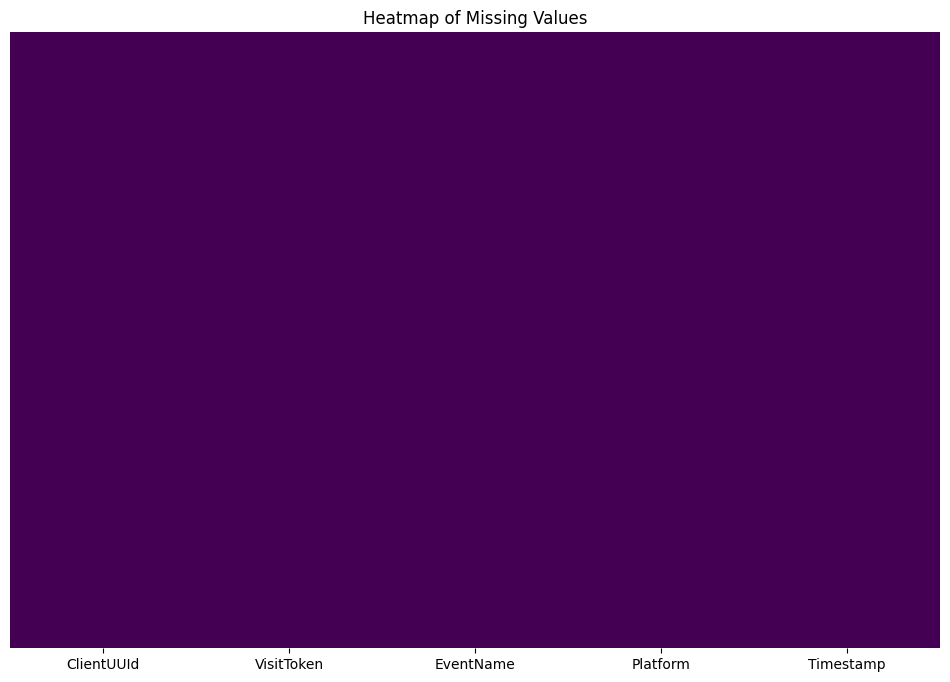

In [94]:
plt.figure(figsize=(12, 8))
sns.heatmap(mobile_events_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### EventName

In [95]:
unique_events = mobile_events_df['EventName'].unique()
print("Unique values in the 'EventName' column:")
print(len(unique_events))
unique_events

Unique values in the 'EventName' column:
11


array(['screen_menu', 'open_app', 'add_to_cart', 'close_app',
       'create_order', 'screen_profile', 'screen_cart',
       'open_product_card', 'apply_personal_offer', 'remove_from_cart',
       'open_bonusaction'], dtype=object)

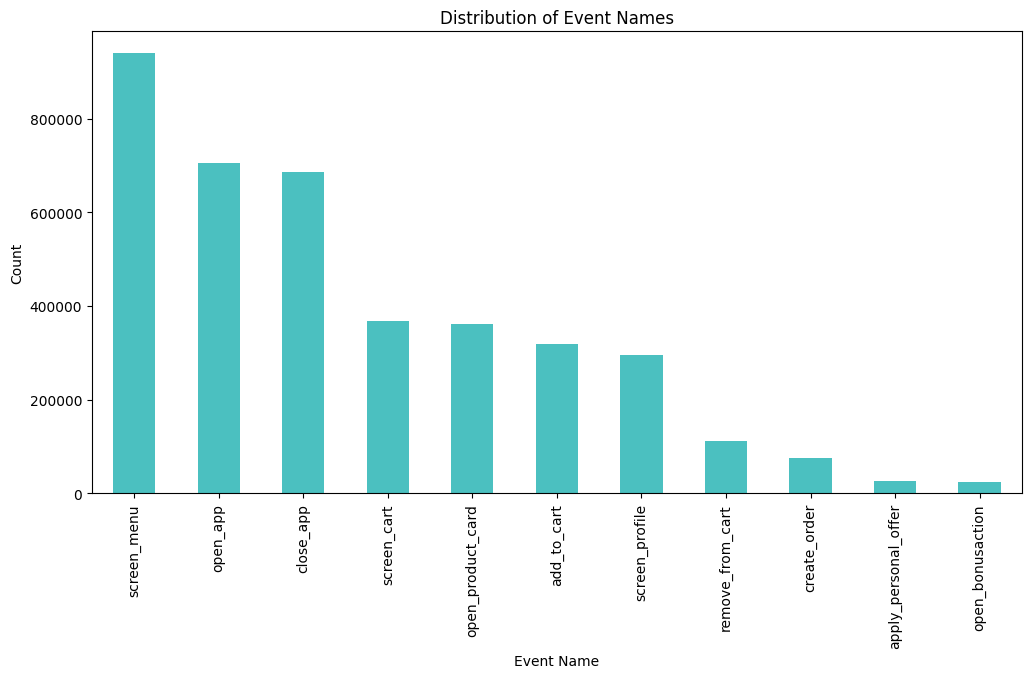

In [96]:
# Count the occurrences of each event name
event_counts = mobile_events_df['EventName'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart
event_counts.plot(kind='bar', ax=ax, color='#4bc0c0')

# Add labels and title
ax.set_xlabel('Event Name')
ax.set_ylabel('Count')
ax.set_title('Distribution of Event Names')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

### Platform

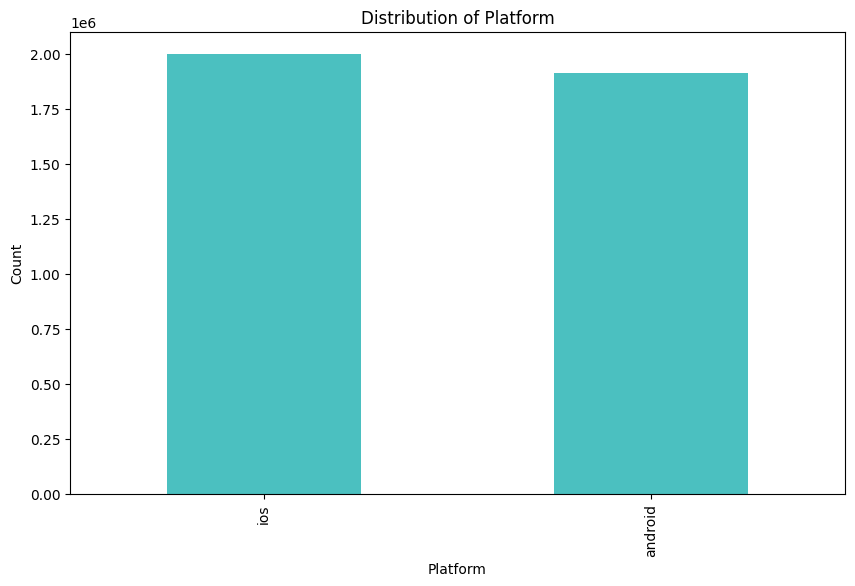

In [97]:
# Assuming 'mobile_events_df' is your DataFrame
platform_counts = mobile_events_df['Platform'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
platform_counts.plot(kind='bar', ax=ax, color='#4bc0c0')

# Add labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Count')
ax.set_title('Distribution of Platform')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

### Encoding categorical features

In [98]:
# Ensure 'VisitToken' and 'Timestamp' columns are in the correct format
mobile_events_df['VisitToken'] = mobile_events_df['VisitToken'].astype(str)
mobile_events_df['Timestamp'] = pd.to_datetime(mobile_events_df['Timestamp'])

# Initialize the LabelEncoder for 'VisitToken'
visit_token_encoder = LabelEncoder()

# Fit and transform the 'VisitToken' column
mobile_events_df['VisitToken'] = visit_token_encoder.fit_transform(mobile_events_df['VisitToken'])

# Convert 'Timestamp' to Unix timestamp
mobile_events_df['Timestamp'] = mobile_events_df['Timestamp'].astype('int64') // 10**9

In [99]:
# One-Hot Encoding for 'EventName'
event_name_dummies = pd.get_dummies(mobile_events_df['EventName'], prefix='EventName').astype(int)

# One-Hot Encoding for 'Platform'
platform_dummies = pd.get_dummies(mobile_events_df['Platform'], prefix='Platform').astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
mobile_events_df = pd.concat([mobile_events_df, event_name_dummies, platform_dummies], axis=1)

In [100]:
mobile_events_df.head()

,ClientUUId,VisitToken,EventName,Platform,Timestamp,EventName_add_to_cart,EventName_apply_personal_offer,EventName_close_app,EventName_create_order,EventName_open_app,EventName_open_bonusaction,EventName_open_product_card,EventName_remove_from_cart,EventName_screen_cart,EventName_screen_menu,EventName_screen_profile,Platform_android,Platform_ios
0,6861,132304,screen_menu,ios,1698596061,0,0,0,0,0,0,0,0,0,1,0,0,1
1,25615,81775,screen_menu,android,1698577476,0,0,0,0,0,0,0,0,0,1,0,1,0
2,19779,152953,open_app,ios,1698578074,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2766,142663,add_to_cart,ios,1698588188,1,0,0,0,0,0,0,0,0,0,0,0,1
4,7155,23329,screen_menu,ios,1698568540,0,0,0,0,0,0,0,0,0,1,0,0,1


In [101]:
mobile_events_df = mobile_events_df.drop('EventName', axis=1)
mobile_events_df = mobile_events_df.drop('Platform', axis=1)

### Correlation matrix

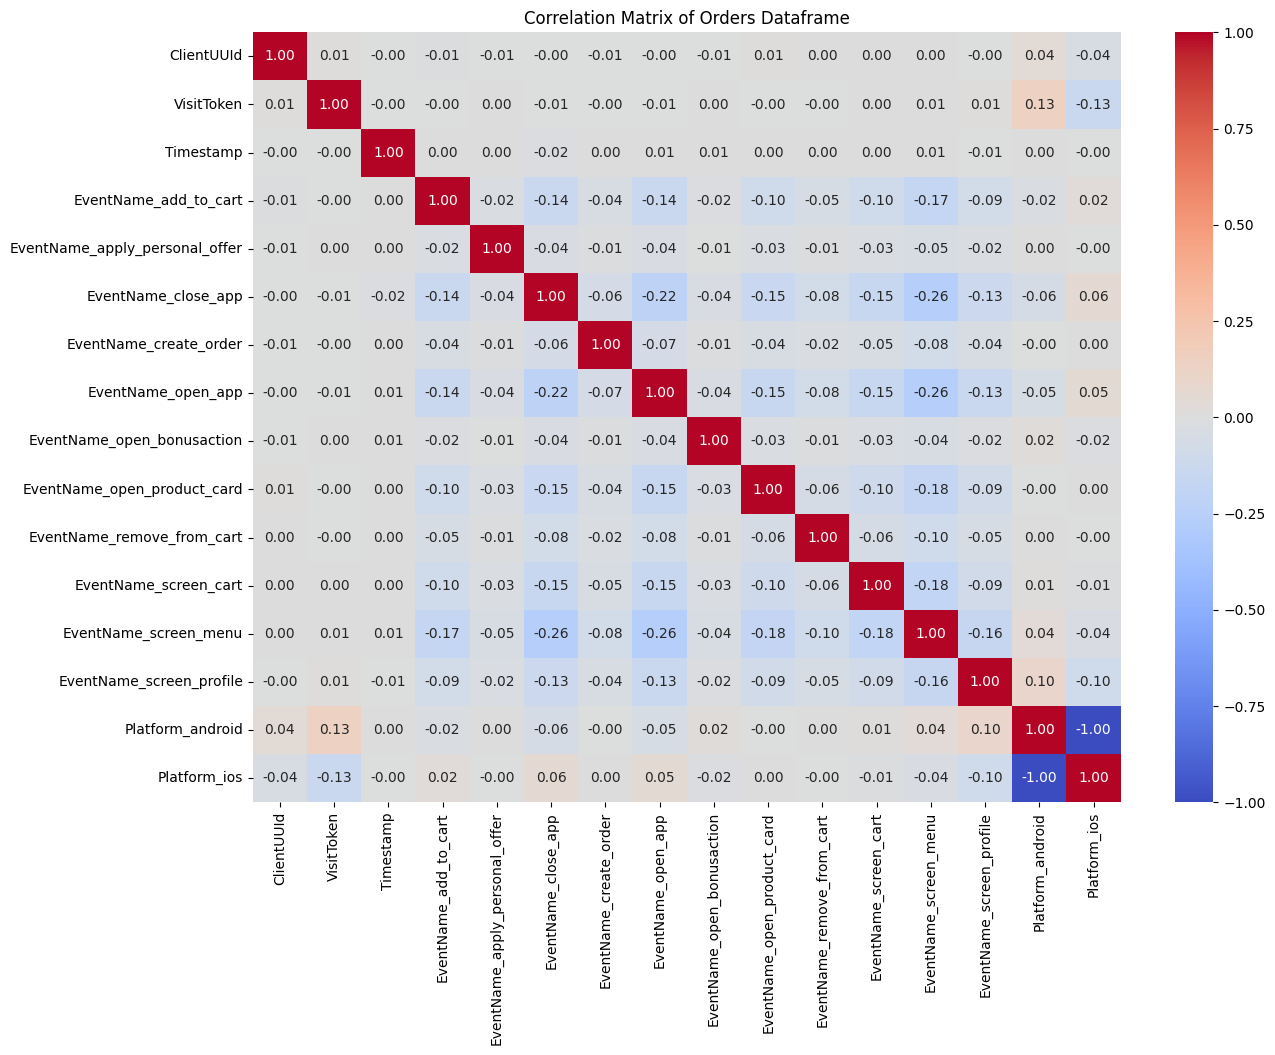

In [102]:
# Compute the correlation matrix
corr_matrix = mobile_events_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Orders Dataframe')
plt.show()

## Clients promo October

In [103]:
clients_promo_october_df.head()

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount
0,1,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,25
1,2,5,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,300
2,4,7,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,200
3,11,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1249,30
4,16,6,2023-10-12T00:00:00.000Z,2023-10-15T23:59:00.000Z,"1,2,3",1299,20


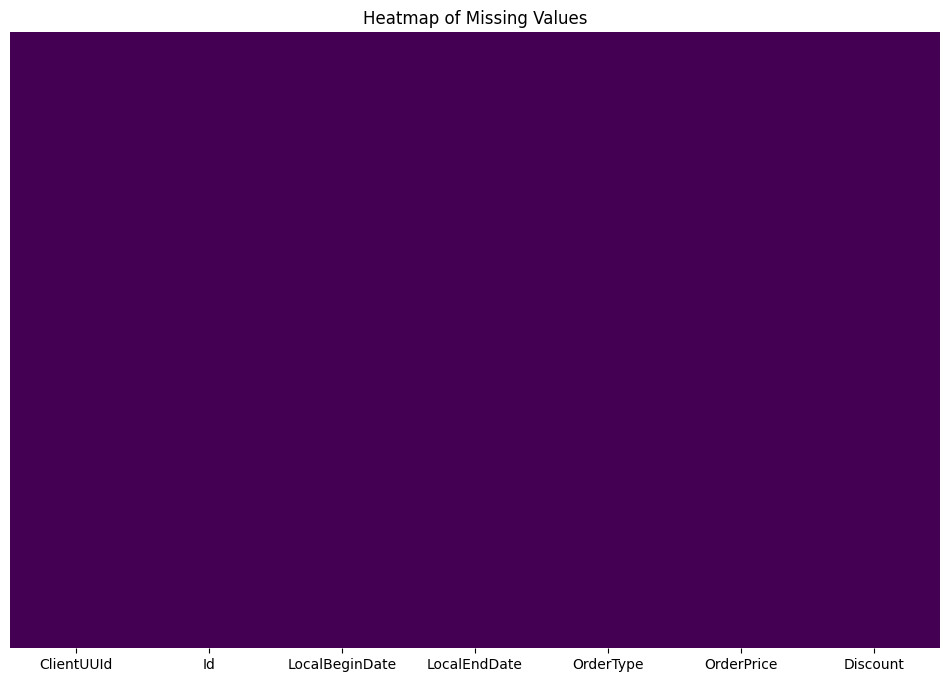

In [104]:
plt.figure(figsize=(12, 8))
sns.heatmap(clients_promo_october_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### Id

In [105]:
clients_promo_october_df['Id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 477275 entries, 0 to 477274
Series name: Id
Non-Null Count   Dtype
--------------   -----
477275 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


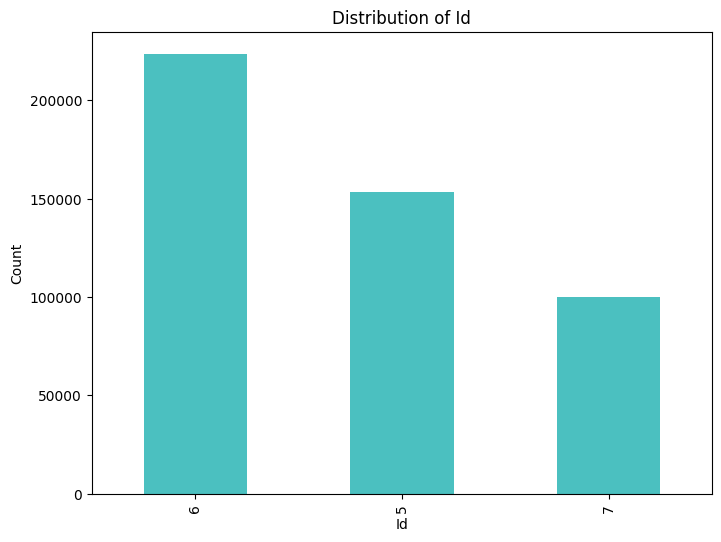

In [106]:
# Assuming 'clients_promo_october_df' is your DataFrame
id_counts = clients_promo_october_df['Id'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
id_counts.plot(kind='bar', ax=ax, color='#4bc0c0')

# Add labels and title
ax.set_xlabel('Id')
ax.set_ylabel('Count')
ax.set_title('Distribution of Id')

# Display the chart
plt.show()

### Begin/End date of promo

In [107]:
# Convert 'LocalBeginDate' and 'LocalEndDate' columns to datetime
clients_promo_october_df['LocalBeginDate'] = pd.to_datetime(clients_promo_october_df['LocalBeginDate'])
clients_promo_october_df['LocalEndDate'] = pd.to_datetime(clients_promo_october_df['LocalEndDate'])

# Calculate the length of the time period in days and hours
clients_promo_october_df['TimePeriodDays'] = (clients_promo_october_df['LocalEndDate'] - clients_promo_october_df['LocalBeginDate']).dt.days
clients_promo_october_df['TimePeriodHours'] = (clients_promo_october_df['LocalEndDate'] - clients_promo_october_df['LocalBeginDate']).dt.total_seconds() // 3600

In [108]:
# Extract stuff from the dates
clients_promo_october_df['BeginDay'] = clients_promo_october_df['LocalBeginDate'].dt.day
clients_promo_october_df['BeginHour'] = clients_promo_october_df['LocalBeginDate'].dt.hour
clients_promo_october_df['BeginMinute'] = clients_promo_october_df['LocalBeginDate'].dt.minute

clients_promo_october_df['EndDay'] = clients_promo_october_df['LocalEndDate'].dt.day
clients_promo_october_df['EndHour'] = clients_promo_october_df['LocalEndDate'].dt.hour
clients_promo_october_df['EndMinute'] = clients_promo_october_df['LocalEndDate'].dt.minute

In [109]:
clients_promo_october_df.head()

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderType,OrderPrice,Discount,TimePeriodDays,TimePeriodHours,BeginDay,BeginHour,BeginMinute,EndDay,EndHour,EndMinute
0,1,6,2023-10-12 00:00:00+00:00,2023-10-15 23:59:00+00:00,"1,2,3",1299,25,3,95.0,12,0,0,15,23,59
1,2,5,2023-10-12 00:00:00+00:00,2023-10-15 23:59:00+00:00,"1,2,3",1299,300,3,95.0,12,0,0,15,23,59
2,4,7,2023-10-12 00:00:00+00:00,2023-10-15 23:59:00+00:00,"1,2,3",1249,200,3,95.0,12,0,0,15,23,59
3,11,6,2023-10-12 00:00:00+00:00,2023-10-15 23:59:00+00:00,"1,2,3",1249,30,3,95.0,12,0,0,15,23,59
4,16,6,2023-10-12 00:00:00+00:00,2023-10-15 23:59:00+00:00,"1,2,3",1299,20,3,95.0,12,0,0,15,23,59


### OrderType

In [110]:
clients_promo_october_df['OrderType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 477275 entries, 0 to 477274
Series name: OrderType
Non-Null Count   Dtype 
--------------   ----- 
477275 non-null  object
dtypes: object(1)
memory usage: 3.6+ MB


C:\Users\user\AppData\Local\Temp\ipykernel_10836\2881824593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clients_promo_october_df, x='OrderType', palette='viridis')


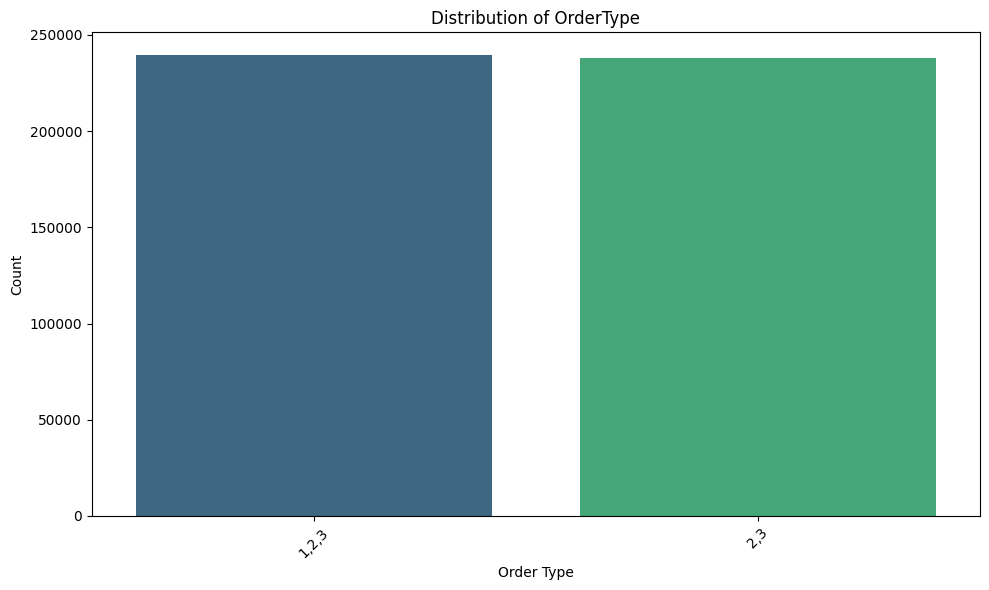

In [111]:
# Visualizing the distribution of OrderType
plt.figure(figsize=(10, 6))
sns.countplot(data=clients_promo_october_df, x='OrderType', palette='viridis')
plt.title('Distribution of OrderType')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

### OrderPrice

In [112]:
clients_promo_october_df['OrderPrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 477275 entries, 0 to 477274
Series name: OrderPrice
Non-Null Count   Dtype
--------------   -----
477275 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


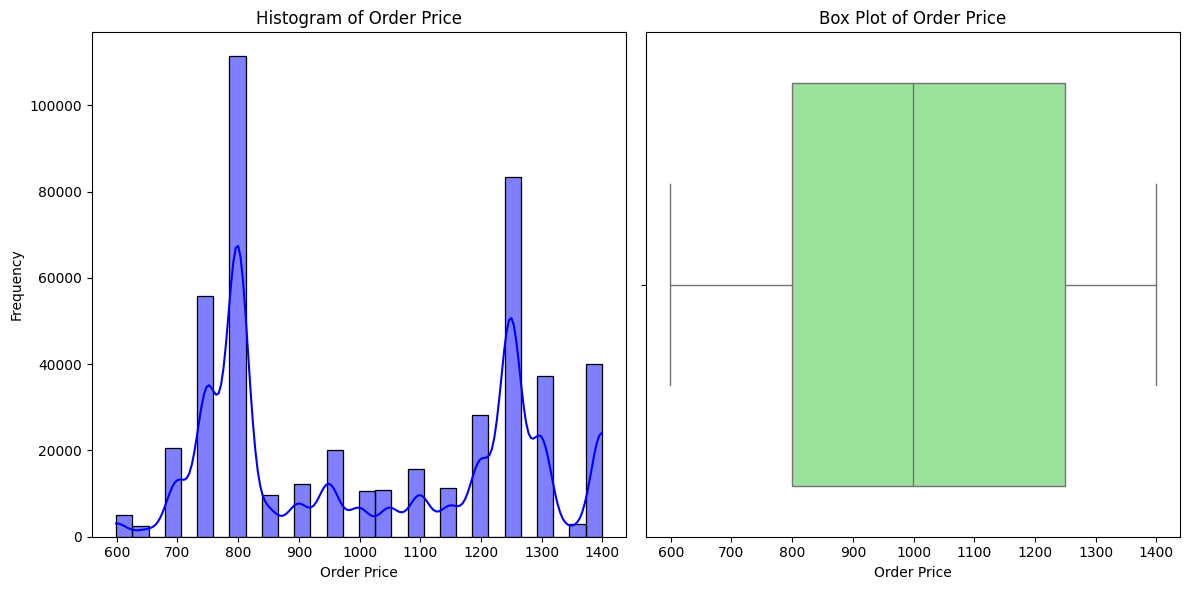

In [113]:
# Visualizing the distribution of OrderPrice with a histogram
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(clients_promo_october_df['OrderPrice'], bins=30, kde=True, color='blue')
plt.title('Histogram of Order Price')
plt.xlabel('Order Price')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=clients_promo_october_df['OrderPrice'], color='lightgreen')
plt.title('Box Plot of Order Price')
plt.xlabel('Order Price')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

### Discount

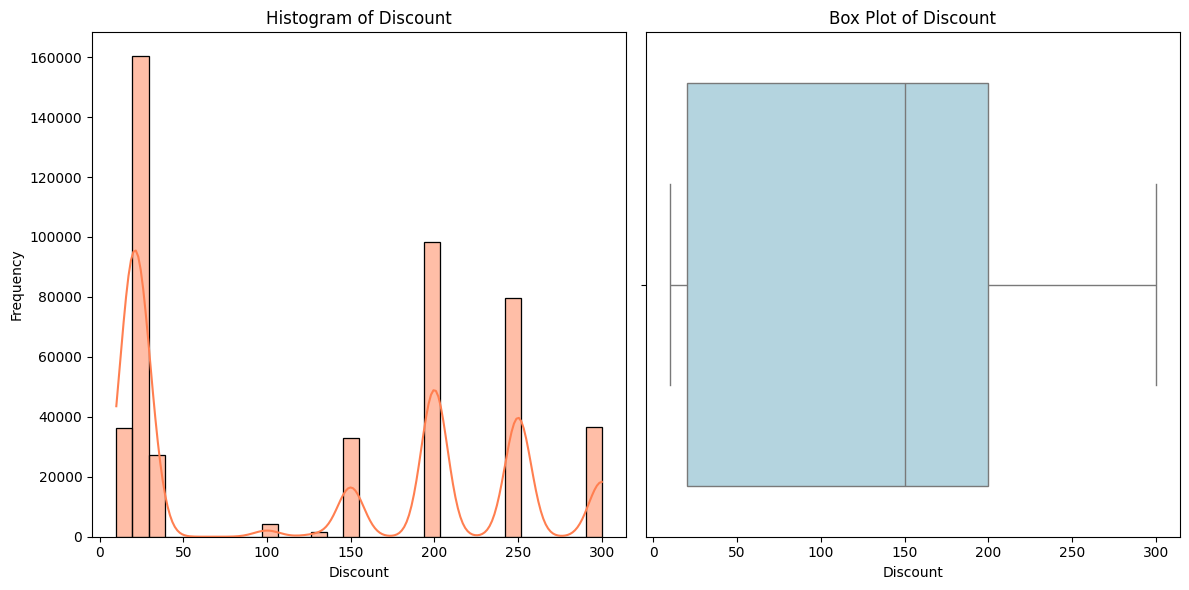

In [114]:
# Visualizing the distribution of Discount with a histogram
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(clients_promo_october_df['Discount'], bins=30, kde=True, color='coral')
plt.title('Histogram of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=clients_promo_october_df['Discount'], color='lightblue')
plt.title('Box Plot of Discount')
plt.xlabel('Discount')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

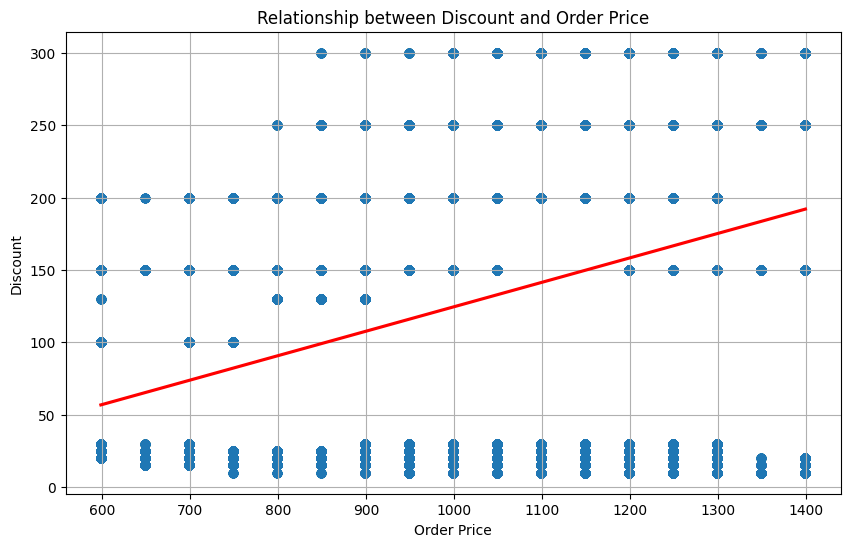

In [115]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='OrderPrice', y='Discount', data=clients_promo_october_df, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title('Relationship between Discount and Order Price')
plt.xlabel('Order Price')
plt.ylabel('Discount')

plt.grid(True)  # Add a grid for better readability
plt.show()

### Encoding cat. features

In [116]:
clients_promo_october_df = clients_promo_october_df.drop('LocalBeginDate', axis=1)
clients_promo_october_df = clients_promo_october_df.drop('LocalEndDate', axis=1)

In [117]:
clients_promo_october_df = pd.get_dummies(clients_promo_october_df, columns=['OrderType'], prefix='OrderType').astype(int)

In [118]:
clients_promo_october_df.head()

,ClientUUId,Id,OrderPrice,Discount,TimePeriodDays,TimePeriodHours,BeginDay,BeginHour,BeginMinute,EndDay,EndHour,EndMinute,"OrderType_1,2,3","OrderType_2,3"
0,1,6,1299,25,3,95,12,0,0,15,23,59,1,0
1,2,5,1299,300,3,95,12,0,0,15,23,59,1,0
2,4,7,1249,200,3,95,12,0,0,15,23,59,1,0
3,11,6,1249,30,3,95,12,0,0,15,23,59,1,0
4,16,6,1299,20,3,95,12,0,0,15,23,59,1,0


### Correlation matrix

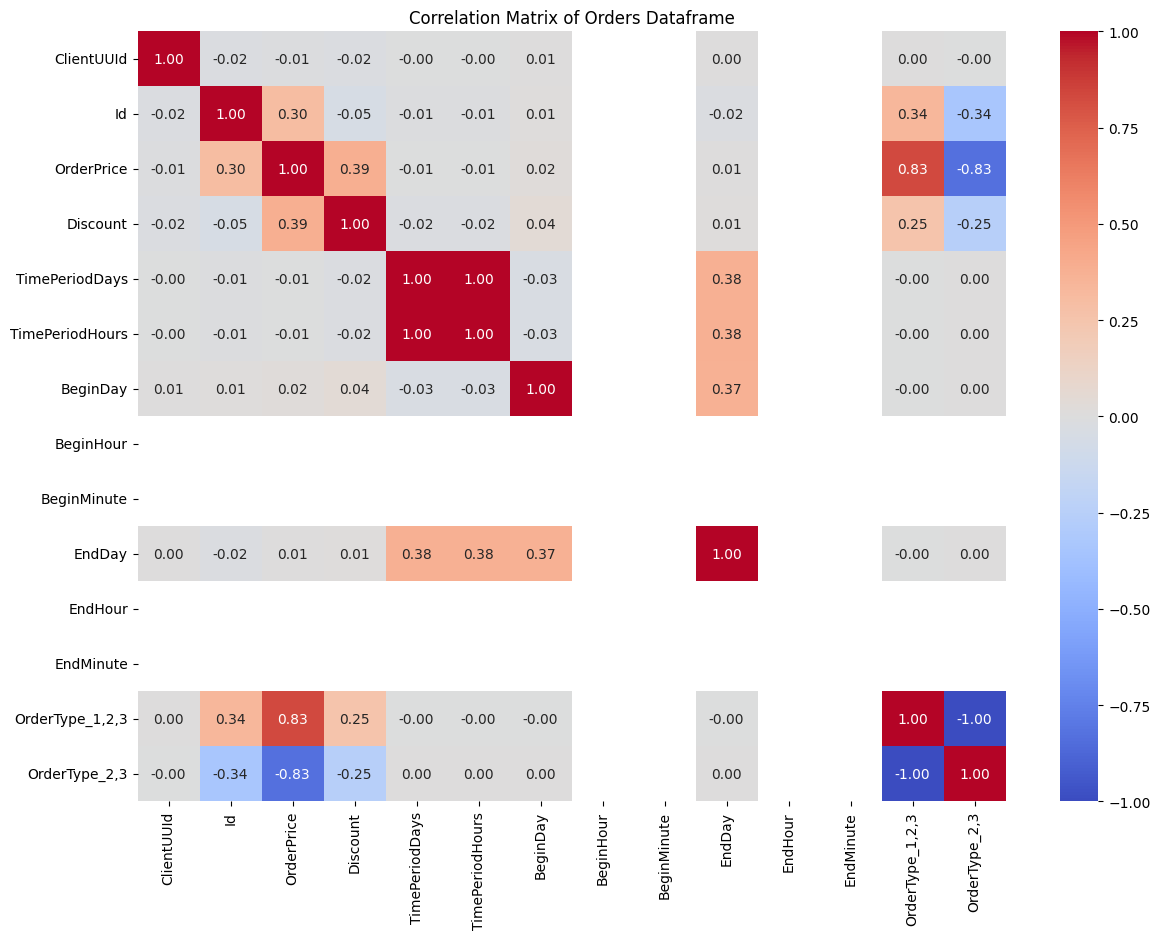

In [119]:
# Compute the correlation matrix
corr_matrix = clients_promo_october_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Orders Dataframe')
plt.show()

## Train target 

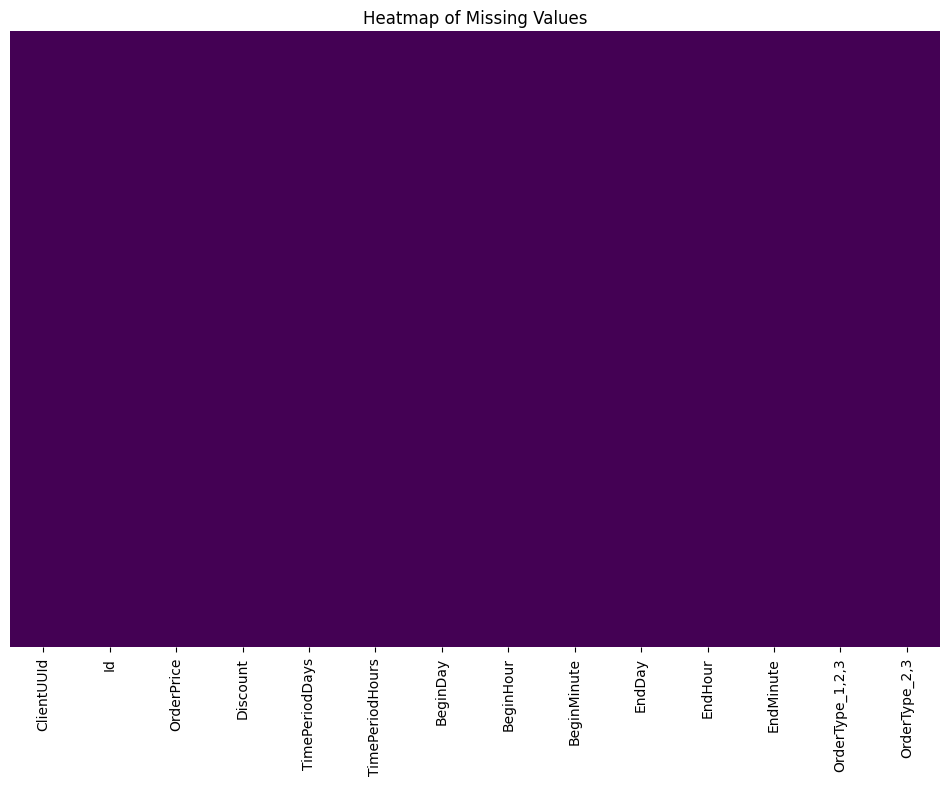

In [120]:
plt.figure(figsize=(12, 8))
sns.heatmap(clients_promo_october_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [121]:
train_target_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo
0,11,7,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,200,0
1,11,6,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,25,0
2,16,5,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,799,200,0
3,16,5,"1,2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,1249,250,0
4,18,6,"2,3",2023-11-02T00:00:00.000Z,2023-11-05T23:59:00.000Z,699,30,0


In [122]:
train_target_df.shape

(27741, 8)

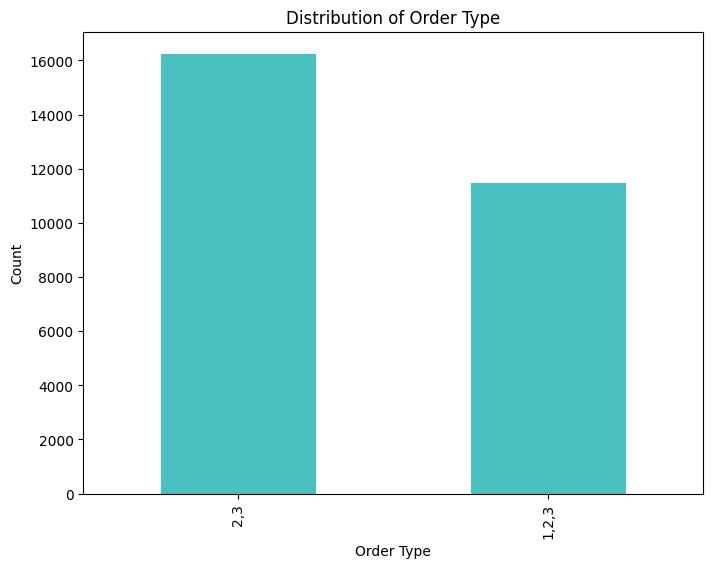

In [123]:
# Assuming 'train_target_df' is your DataFrame
order_type_counts = train_target_df['OrderType'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
order_type_counts.plot(kind='bar', ax=ax, color='#4bc0c0')

# Add labels and title
ax.set_xlabel('Order Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Order Type')

# Display the chart
plt.show()

### Encoding categorical features

In [124]:
# Ensure the columns are in datetime format
train_target_df['LocalBeginDate'] = pd.to_datetime(train_target_df['LocalBeginDate'])
train_target_df['LocalEndDate'] = pd.to_datetime(train_target_df['LocalEndDate'])

# Extract day and hour from LocalBeginDate
train_target_df['BeginDay'] = train_target_df['LocalBeginDate'].dt.day
train_target_df['BeginHour'] = train_target_df['LocalBeginDate'].dt.hour

# Extract day and hour from LocalEndDate
train_target_df['EndDay'] = train_target_df['LocalEndDate'].dt.day
train_target_df['EndHour'] = train_target_df['LocalEndDate'].dt.hour

In [125]:
# Calculate the time difference between LocalBeginDate and LocalEndDate
train_target_df['PromoPeriodLength'] = train_target_df['LocalEndDate'] - train_target_df['LocalBeginDate']

# Convert the time difference to days and hours
train_target_df['TimePeriodLengthDays'] = train_target_df['PromoPeriodLength'].dt.days
train_target_df['TimePeriodLengthHours'] = train_target_df['PromoPeriodLength'].dt.total_seconds() / 3600

In [126]:
train_target_df['OrderType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27741 entries, 0 to 27740
Series name: OrderType
Non-Null Count  Dtype 
--------------  ----- 
27741 non-null  object
dtypes: object(1)
memory usage: 216.9+ KB


In [127]:
train_target_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount,apply_promo,BeginDay,BeginHour,EndDay,EndHour,PromoPeriodLength,TimePeriodLengthDays,TimePeriodLengthHours
0,11,7,"2,3",2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,699,200,0,2,0,5,23,3 days 23:59:00,3,95.983333
1,11,6,"1,2,3",2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,1249,25,0,2,0,5,23,3 days 23:59:00,3,95.983333
2,16,5,"2,3",2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,799,200,0,2,0,5,23,3 days 23:59:00,3,95.983333
3,16,5,"1,2,3",2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,1249,250,0,2,0,5,23,3 days 23:59:00,3,95.983333
4,18,6,"2,3",2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,699,30,0,2,0,5,23,3 days 23:59:00,3,95.983333


In [128]:
# Ensure the OrderType is treated as string
train_target_df['OrderType'] = train_target_df['OrderType'].astype(str)

# Apply one-hot encoding
order_type_one_hot = pd.get_dummies(train_target_df['OrderType'], prefix='OrderType').astype(int)

# Join the one-hot encoded columns back to the original dataframe
train_target_df_encoded = train_target_df.join(order_type_one_hot)


In [129]:
train_target_df_encoded = train_target_df_encoded.drop(['OrderType', 'LocalBeginDate', 'LocalEndDate', 'PromoPeriodLength'], axis=1)

In [130]:
train_target_df_encoded.head()

,ClientUUId,Id,OrderPrice,Discount,apply_promo,BeginDay,BeginHour,EndDay,EndHour,TimePeriodLengthDays,TimePeriodLengthHours,"OrderType_1,2,3","OrderType_2,3"
0,11,7,699,200,0,2,0,5,23,3,95.983333,0,1
1,11,6,1249,25,0,2,0,5,23,3,95.983333,1,0
2,16,5,799,200,0,2,0,5,23,3,95.983333,0,1
3,16,5,1249,250,0,2,0,5,23,3,95.983333,1,0
4,18,6,699,30,0,2,0,5,23,3,95.983333,0,1


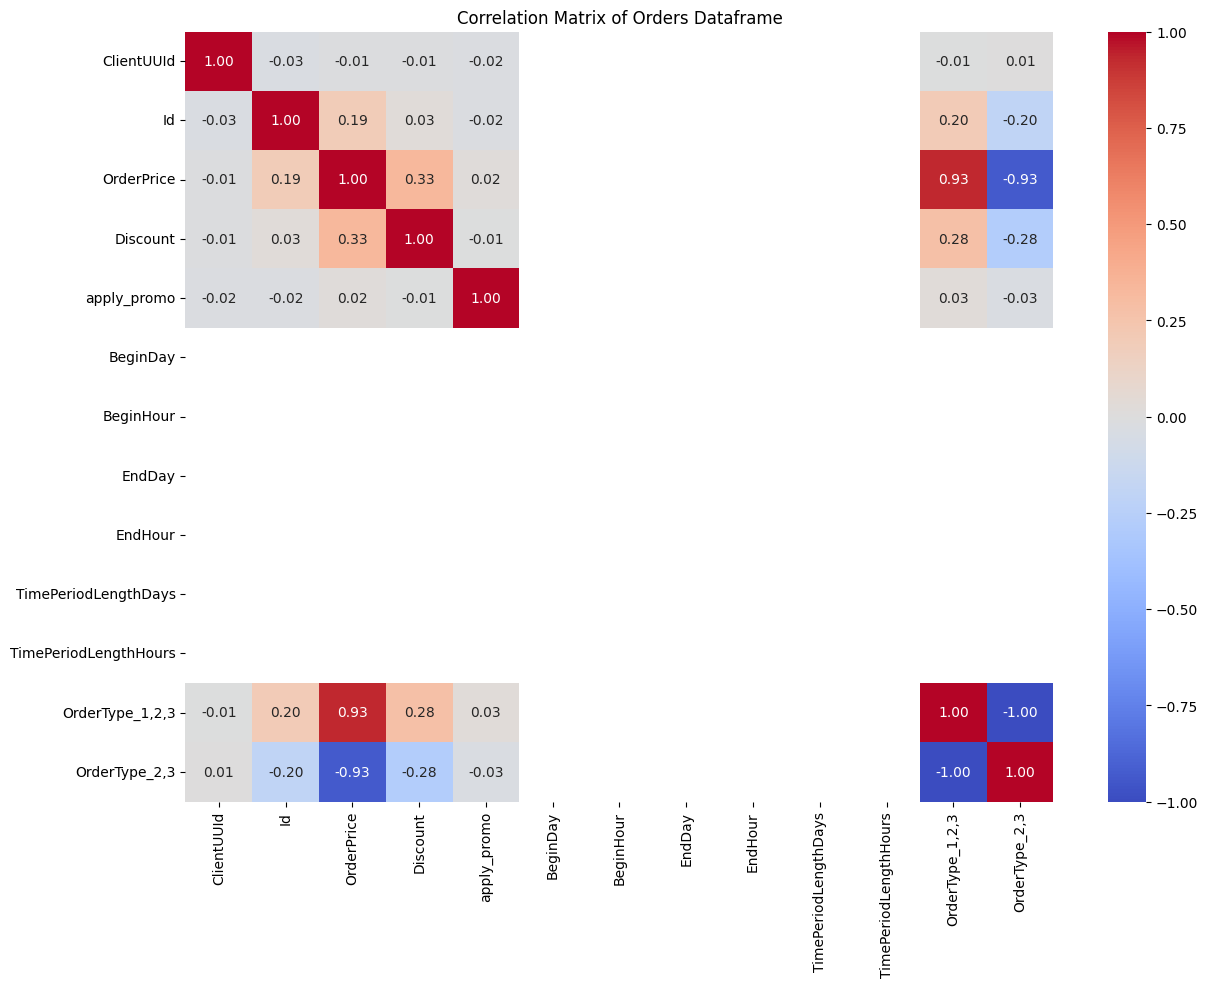

In [131]:
# Compute the correlation matrix
corr_matrix = train_target_df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Orders Dataframe')
plt.show()

## Test

In [132]:
test_df.head()

,ClientUUId,Id,OrderType,LocalBeginDate,LocalEndDate,OrderPrice,Discount
0,25,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
1,39,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,699,200
2,57,6,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,20
3,59,5,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200
4,88,7,"2,3",2023-11-02T00:00:00Z,2023-11-05T23:59:00Z,799,200


In [141]:
# Convert the 'SaleDate' column to datetime
test_df['LocalBeginDate'] = pd.to_datetime(test_df['LocalBeginDate'])
test_df['LocalEndDate'] = pd.to_datetime(test_df['LocalEndDate'])

# Extracting components
test_df['TestPromoBeginDay'] = test_df['LocalBeginDate'].dt.day
test_df['TestPromoBeginHour'] = test_df['LocalBeginDate'].dt.hour

test_df['TestPromoEndDay'] = test_df['LocalEndDate'].dt.day
test_df['TestPromoEndHour'] = test_df['LocalEndDate'].dt.hour


In [144]:
test_df['OrderType'] = test_df['OrderType'].astype(str)

# Apply one-hot encoding
test_df = pd.get_dummies(test_df, columns=['OrderType'], prefix='OrderType').astype('int64')

KeyError: 'OrderType'

In [145]:
test_df.head()

,ClientUUId,Id,LocalBeginDate,LocalEndDate,OrderPrice,Discount,TestPromoBeginDay,TestPromoBeginHour,TestPromoEndDay,TestPromoEndHour,"OrderType_1,2,3","OrderType_2,3"
0,25,7,2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,799,200,2,0,5,23,False,True
1,39,5,2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,699,200,2,0,5,23,False,True
2,57,6,2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,799,20,2,0,5,23,False,True
3,59,5,2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,799,200,2,0,5,23,False,True
4,88,7,2023-11-02 00:00:00+00:00,2023-11-05 23:59:00+00:00,799,200,2,0,5,23,False,True


In [146]:
test_df['OrderType_1,2,3'] = test_df['OrderType_1,2,3'].astype(int)
test_df['OrderType_2,3'] = test_df['OrderType_2,3'].astype(int)

In [148]:
test_df = test_df.drop('LocalBeginDate', axis=1)
test_df = test_df.drop('LocalEndDate', axis=1)

In [149]:
test_df.head()

,ClientUUId,Id,OrderPrice,Discount,TestPromoBeginDay,TestPromoBeginHour,TestPromoEndDay,TestPromoEndHour,"OrderType_1,2,3","OrderType_2,3"
0,25,7,799,200,2,0,5,23,0,1
1,39,5,699,200,2,0,5,23,0,1
2,57,6,799,20,2,0,5,23,0,1
3,59,5,799,200,2,0,5,23,0,1
4,88,7,799,200,2,0,5,23,0,1


## Final dataframes

In [137]:
train_target_df_encoded.to_csv('train_target_encoded_final.csv', index=False)

In [134]:
orders_df.to_csv('orders_final.csv', index=False)

In [135]:
mobile_events_df.to_csv('mobile_events_final.csv', index=False)

In [136]:
clients_promo_october_df.to_csv('clients_promo_october_final.csv', index=False)

In [150]:
test_df.to_csv('test_final.csv', index=False)